In [1]:
import pandas as pd
import numpy as np
import igraph as ig
import collections
import matplotlib
%matplotlib inline

## Explore Data

In [2]:
df_unweighted = pd.read_csv('combined_final_unweighted.csv')
df_unweighted

node_start                node_end        status
0          Hong Kong                   Samoa  jurisdiction
1          Hong Kong                   Samoa  jurisdiction
2          Hong Kong                   Samoa  jurisdiction
3          Hong Kong                   Samoa  jurisdiction
4          Hong Kong                   Samoa  jurisdiction
...              ...                     ...           ...
338127     Indonesia  British Virgin Islands  officer_base
338128  Cook Islands  British Virgin Islands  officer_base
338129     Hong Kong  British Virgin Islands  officer_base
338130  Cook Islands          United Kingdom  officer_base
338131     Hong Kong          United Kingdom  officer_base

[338132 rows x 3 columns]

In [3]:
df_weighted = pd.read_csv('combined_final_weighted.csv')
df_weighted

node_start                node_end        status  weight
0          Hong Kong                   Samoa  jurisdiction     2.0
1          Hong Kong                   Samoa  jurisdiction     2.0
2          Hong Kong                   Samoa  jurisdiction     2.0
3          Hong Kong                   Samoa  jurisdiction     2.0
4          Hong Kong                   Samoa  jurisdiction     2.0
...              ...                     ...           ...     ...
338119     Indonesia  British Virgin Islands  officer_base     1.0
338120  Cook Islands  British Virgin Islands  officer_base     1.0
338121     Hong Kong  British Virgin Islands  officer_base     1.0
338122  Cook Islands          United Kingdom  officer_base     1.0
338123     Hong Kong          United Kingdom  officer_base     1.0

[338124 rows x 4 columns]

In [4]:
df_weighted['status'].unique()

array(['jurisdiction', 'intermediary_base', 'intermediary_jurisdiction',
       'officer_base', 'officer_jurisdiction'], dtype=object)

In [5]:
jurisdiction_status_list = ['jurisdiction', 'intermediary_jurisdiction', 'officer_jurisdiction']

In [6]:
df_weighted_jur = df_weighted[df_weighted['status'].isin(jurisdiction_status_list)]
df_jur = df_weighted_jur.drop(['status'], axis = 1)
df_jur

node_start                node_end  weight
0          Hong Kong                   Samoa     2.0
1          Hong Kong                   Samoa     2.0
2          Hong Kong                   Samoa     2.0
3          Hong Kong                   Samoa     2.0
4          Hong Kong                   Samoa     2.0
...              ...                     ...     ...
221140         China  British Virgin Islands     0.5
221175   New Zealand  British Virgin Islands     0.5
221176  Cook Islands  British Virgin Islands     0.5
221177     Singapore  British Virgin Islands     0.5
221178        Russia               Singapore     0.5

[218952 rows x 3 columns]

In [7]:
df_jur_grouped = df_jur.groupby(['node_start','node_end'], as_index = False).sum()
df_jur_grouped

node_start                node_end  weight
0       Albania                 Bahamas     4.0
1       Andorra                 Bahamas    52.0
2       Andorra  British Virgin Islands    78.0
3       Andorra          Cayman Islands     2.0
4       Andorra            Cook Islands     0.5
...         ...                     ...     ...
1293    Vietnam                  Panama     2.0
1294      Yemen                  Panama     2.0
1295     Zambia  British Virgin Islands     4.0
1296   Zimbabwe  British Virgin Islands    10.0
1297   Zimbabwe                  Panama     6.0

[1298 rows x 3 columns]

### Convert Data to an Undirected Edge List

In [8]:
df_jur_grouped_list = df_jur_grouped.values.tolist()
df_jur_grouped_list

[['Albania', 'Bahamas', 4.0],
 ['Andorra', 'Bahamas', 52.0],
 ['Andorra', 'British Virgin Islands', 78.0],
 ['Andorra', 'Cayman Islands', 2.0],
 ['Andorra', 'Cook Islands', 0.5],
 ['Andorra', 'Costa Rica', 6.0],
 ['Andorra', 'Hong Kong', 18.0],
 ['Andorra', 'Nevada', 48.0],
 ['Andorra', 'Niue', 24.0],
 ['Andorra', 'Panama', 558.0],
 ['Andorra', 'Samoa', 18.0],
 ['Andorra', 'Seychelles', 144.0],
 ['Andorra', 'United Kingdom', 2.0],
 ['Andorra', 'Uruguay', 30.0],
 ['Angola', 'Bermuda', 2.0],
 ['Angola', 'British Virgin Islands', 22.0],
 ['Antigua and Barbuda', 'Barbados', 16.0],
 ['Antigua and Barbuda', 'British Virgin Islands', 3.5],
 ['Antigua and Barbuda', 'Cayman Islands', 2.0],
 ['Antigua and Barbuda', 'Niue', 4.0],
 ['Antigua and Barbuda', 'Panama', 30.0],
 ['Antigua and Barbuda', 'Saint Kitts and Nevis', 2.0],
 ['Antigua and Barbuda', 'Samoa', 0.5],
 ['Antigua and Barbuda', 'Seychelles', 6.0],
 ['Argentina', 'Bahamas', 46.0],
 ['Argentina', 'Barbados', 2.0],
 ['Argentina', 'Britis

In [9]:
d = collections.defaultdict(int)
for n1, n2, v in df_jur_grouped_list:
    d[min(n1, n2), max(n1, n2)] += v
result = [[k[0], k[1], v] for k, v in d.items()]

In [10]:
df_net = pd.DataFrame(result)
df_net

0                       1     2
0                    Albania                 Bahamas   4.0
1                    Andorra                 Bahamas  52.0
2                    Andorra  British Virgin Islands  78.0
3                    Andorra          Cayman Islands   2.0
4                    Andorra            Cook Islands   0.5
...                      ...                     ...   ...
1203                  Panama                 Vietnam   2.0
1204                  Panama                   Yemen   2.0
1205  British Virgin Islands                  Zambia   4.0
1206  British Virgin Islands                Zimbabwe  10.0
1207                  Panama                Zimbabwe   6.0

[1208 rows x 3 columns]

In [11]:
df_net = df_net.rename(columns = {0:'node_1', 1:'node_2', 2: 'weight'})
df_net

node_1                  node_2  weight
0                    Albania                 Bahamas     4.0
1                    Andorra                 Bahamas    52.0
2                    Andorra  British Virgin Islands    78.0
3                    Andorra          Cayman Islands     2.0
4                    Andorra            Cook Islands     0.5
...                      ...                     ...     ...
1203                  Panama                 Vietnam     2.0
1204                  Panama                   Yemen     2.0
1205  British Virgin Islands                  Zambia     4.0
1206  British Virgin Islands                Zimbabwe    10.0
1207                  Panama                Zimbabwe     6.0

[1208 rows x 3 columns]

In [12]:
#df_net.to_csv('undirected_weighted_grouped.csv', index = False)

In [13]:
df_net.describe()

weight
count   1208.000000
mean     359.531871
std     2344.486509
min        0.500000
25%        2.000000
50%        9.250000
75%       52.500000
max    55256.500000

## Create Graph

In [14]:
g = ig.Graph.TupleList(df_net.itertuples(index=False), directed=False, edge_attrs={'weight': "weight"})


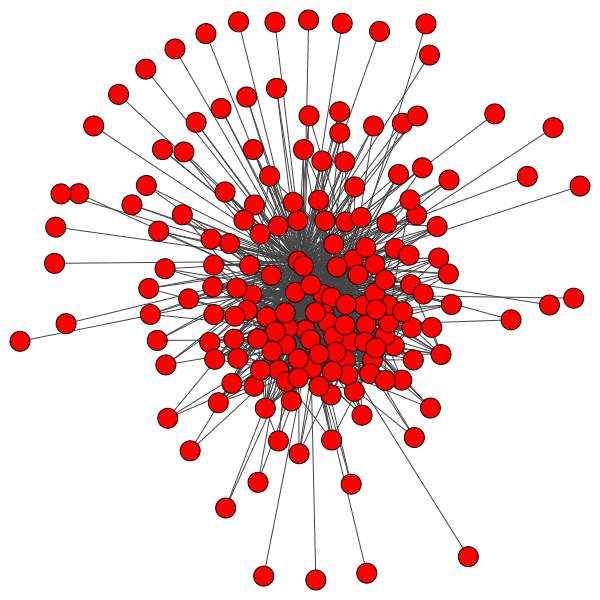

In [15]:
ig.plot(g)

In [16]:
g.diameter()

4

In [17]:
print( "Clustering Coefficient: ", g.transitivity_undirected())

Clustering Coefficient:  0.2562554798678087


In [18]:
np.mean(g.degree())

13.805714285714286

In [19]:
np.mean(g.strength(weights = 'weight'))

4963.594285714285

In [20]:
df_strength = pd.DataFrame({'name': list(g.vs['name']), 'weighted_degree':g.strength(weights = 'weight') } )
df_strength = df_strength.sort_values('weighted_degree', ascending = False).reset_index(drop = True)
df_strength

name  weighted_degree
0       British Virgin Islands         233461.5
1                       Panama         104017.0
2                    Hong Kong          79276.5
3                  Switzerland          76316.5
4                      Bahamas          40407.5
..                         ...              ...
170                     Malawi              2.0
171  Sint Maarten (Dutch part)              2.0
172                      Nauru              2.0
173                    Lesotho              2.0
174   Northern Mariana Islands              0.5

[175 rows x 2 columns]

### Metrics

In [101]:
def get_diameter(community):
    
    diameters = []
    
    for i in range(len(community.subgraphs())):
    
        diameters.append(community.subgraphs()[i].diameter())

    return (diameters)

In [102]:
def get_transitivity(community):
    
    transitivity = []
    
    for i in range(len(community.subgraphs())):
    
        transitivity.append(community.subgraphs()[i].transitivity_undirected())

    return (transitivity)

In [97]:
def get_avg_degree(community):
    
    degree = []
    
    for i in range(len(community.subgraphs())):
    
        degree.append(np.mean(community.subgraphs()[i].degree()))

    return degree

In [98]:
def get_avg_weighted_degree(community):
    
    weighted_degree = []
    
    for i in range(len(community.subgraphs())):
    
        weighted_degree.append(np.mean(community.subgraphs()[i].strength(weights = 'weight')))

    return weighted_degree

## Community Detection

### Louvain Community Detection

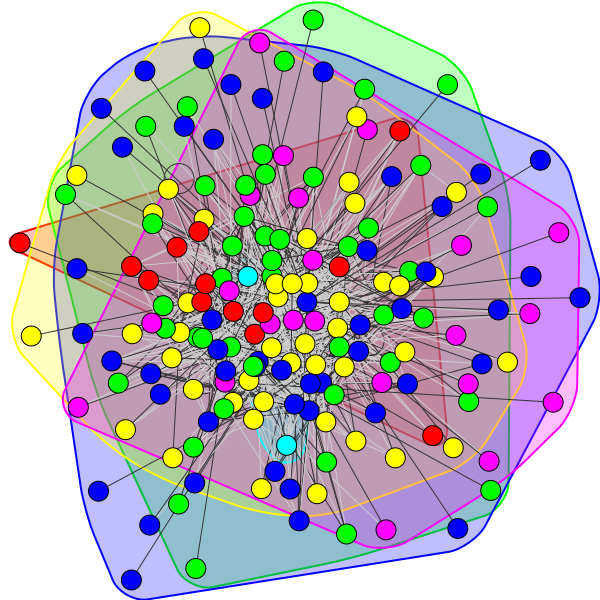

In [20]:
comm_louvain = g.community_multilevel(weights = 'weight')

ig.plot(comm_louvain, mark_groups = True, layout="drl")

In [21]:
modularity = g.modularity(comm_louvain, weights='weight')
print(modularity)

0.1635560856610695


In [106]:
print('average weighted degree: ', get_avg_weighted_degree(comm_louvain))
print('average degree: ', get_avg_degree(comm_louvain))
print('transitivity: ', get_transitivity(comm_louvain))
print('diameter: ', get_diameter(comm_louvain))

average weighted degree:  [680.9230769230769, 3109.3333333333335, 5573.571428571428, 370.0681818181818, 538.0454545454545, 845.0]
average degree:  [2.0, 4.711111111111111, 4.040816326530612, 5.318181818181818, 2.3636363636363638, 1.0]
transitivity:  [0.04411764705882353, 0.19753846153846155, 0.18665811417575368, 0.25, 0.07407407407407407, nan]
diameter:  [2, 3, 3, 4, 3, 1]


In [22]:
df_louvain = pd.DataFrame({'name': list(g.vs['name']), 'community':comm_louvain.membership } )
df_louvain

name  community
0                   Albania          0
1                   Bahamas          0
2                   Andorra          1
3    British Virgin Islands          2
4            Cayman Islands          3
..                      ...        ...
170               Venezuela          1
171                 Vietnam          3
172                   Yemen          1
173                  Zambia          2
174                Zimbabwe          2

[175 rows x 2 columns]

In [23]:
df_louvain.describe()

community
count  175.000000
mean     2.131429
std      1.184132
min      0.000000
25%      1.000000
50%      2.000000
75%      3.000000
max      5.000000

In [24]:
df_louvain[df_louvain['community'] == 0]

name  community
0       Albania          0
1       Bahamas          0
28   Azerbaijan          0
29       Cyprus          0
33      Wyoming          0
73      Denmark          0
82      Finland          0
131     Nigeria          0
139      Poland          0
144      Russia          0
158      Sweden          0
160       Syria          0
167     Ukraine          0

In [25]:
df_louvain[df_louvain['community'] == 1].head(99)

name  community
2                      Andorra          1
6                   Costa Rica          1
8                       Nevada          1
9                         Niue          1
10                      Panama          1
14                     Uruguay          1
20                   Argentina          1
38                     Belgium          1
39                      Belize          1
48                     Bolivia          1
50                      Brazil          1
60                  Luxembourg          1
65                       Chile          1
67                    Colombia          1
72               Côte d'Ivoire          1
74                    Djibouti          1
75                    Dominica          1
76          Dominican Republic          1
77                     Ecuador          1
78                       Egypt          1
79                 El Salvador          1
86                     Germany          1
88                      Greece          1
90                   Guatemala          1
92                       Haiti          1
93                    Honduras          1
100                       Iran          1
109                     Kuwait          1
114                      Libya          1
115                  Lithuania          1
121                     Mexico          1
123                     Monaco          1
129                      Nauru          1
130                  Nicaragua          1
136                   Paraguay          1
137                       Peru          1
140                   Portugal          1
142                      Qatar          1
149  Sint Maarten (Dutch part)          1
150                   Slovakia          1
154                      Spain          1
156                      Sudan          1
159                Switzerland          1
170                  Venezuela          1
172                      Yemen          1

In [26]:
df_louvain[df_louvain['community'] == 2]

name  community
3      British Virgin Islands          2
7                   Hong Kong          2
13             United Kingdom          2
15                     Angola          2
22                      Aruba          2
25                Isle of Man          2
30                      Malta          2
37                    Belarus          2
40                  Mauritius          2
41                     Jersey          2
43              Liechtenstein          2
45                  Singapore          2
53                     Brunei          2
57                  Gibraltar          2
59                   Guernsey          2
63   Central African Republic          2
64                       Chad          2
66                      China          2
69                       Cuba          2
71             Czech Republic          2
80                    Estonia          2
89                       Guam          2
95                    Vanuatu          2
97                    Iceland          2
99                  Indonesia          2
101                   Ireland          2
106                    Jordan          2
107                Kazakhstan          2
108                     Kenya          2
110                Kyrgyzstan          2
111                    Latvia          2
116                     Macao          2
118                    Malawi          2
120                      Mali          2
122                   Moldova          2
124                  Mongolia          2
125                Montenegro          2
132  Northern Mariana Islands          2
134                      Oman          2
152              South Africa          2
155                 Sri Lanka          2
161                    Taiwan          2
162                  Tanzania          2
164                   Tunisia          2
165                    Turkey          2
166                    Uganda          2
169                Uzbekistan          2
173                    Zambia          2
174                  Zimbabwe          2

In [27]:
df_louvain[df_louvain['community'] == 3]

name  community
4                      Cayman Islands          3
5                        Cook Islands          3
11                              Samoa          3
16                            Bermuda          3
17                Antigua and Barbuda          3
18                           Barbados          3
19              Saint Kitts and Nevis          3
21                        New Zealand          3
24                          Australia          3
27                            Austria          3
31               Netherlands Antilles          3
32                        Saint Lucia          3
34                            Bahrain          3
36                         Bangladesh          3
42                            Liberia          3
44                        Netherlands          3
46           Turks and Caicos Islands          3
47                      United States          3
51                   Marshall Islands          3
52                  State of Delaware          3
56                             Canada          3
58                            Grenada          3
61   Saint Vincent and the Grenadines          3
62                  US Virgin Islands          3
68                            Croatia          3
70                            Curaçao          3
81                               Fiji          3
83                             France          3
84                      French Guiana          3
91                             Guyana          3
98                              India          3
104                           Jamaica          3
105                             Japan          3
133                            Norway          3
135                          Pakistan          3
138                       Philippines          3
141                       Puerto Rico          3
145        Saint Martin (French part)          3
146                      Saudi Arabia          3
148                      Sierra Leone          3
153                       South Korea          3
157                          Suriname          3
163               Trinidad and Tobago          3
171                           Vietnam          3

In [28]:
df_louvain[df_louvain['community'] == 4]

name  community
12             Seychelles          4
23       British Anguilla          4
35   United Arab Emirates          4
49               Botswana          4
54               Bulgaria          4
55               Cameroon          4
85                Georgia          4
87                  Ghana          4
94               Thailand          4
96                Hungary          4
102                Israel          4
103                 Italy          4
112               Lebanon          4
113               Lesotho          4
117             Macedonia          4
126               Morocco          4
127            Mozambique          4
128               Namibia          4
143               Romania          4
147               Senegal          4
151              Slovenia          4
168                 Dubai          4

In [29]:
# Define colors used for visualization
colors = ['blue', 'yellow', 'green','purple', 'pink', 'orange', 'lightcoral', 'plum', 'darkgreen', 'darkblue', 'rosybrown',
         'crimson', 'steelblue', 'khaki', 'moccasin', 'orangered', 'fuchsia', 'thistle', 'salmon', 'chocolate', 'lightseagreen',
         'springgreen', 'darkseagreen', 'deeppink', 'mediumvioletred','olive']

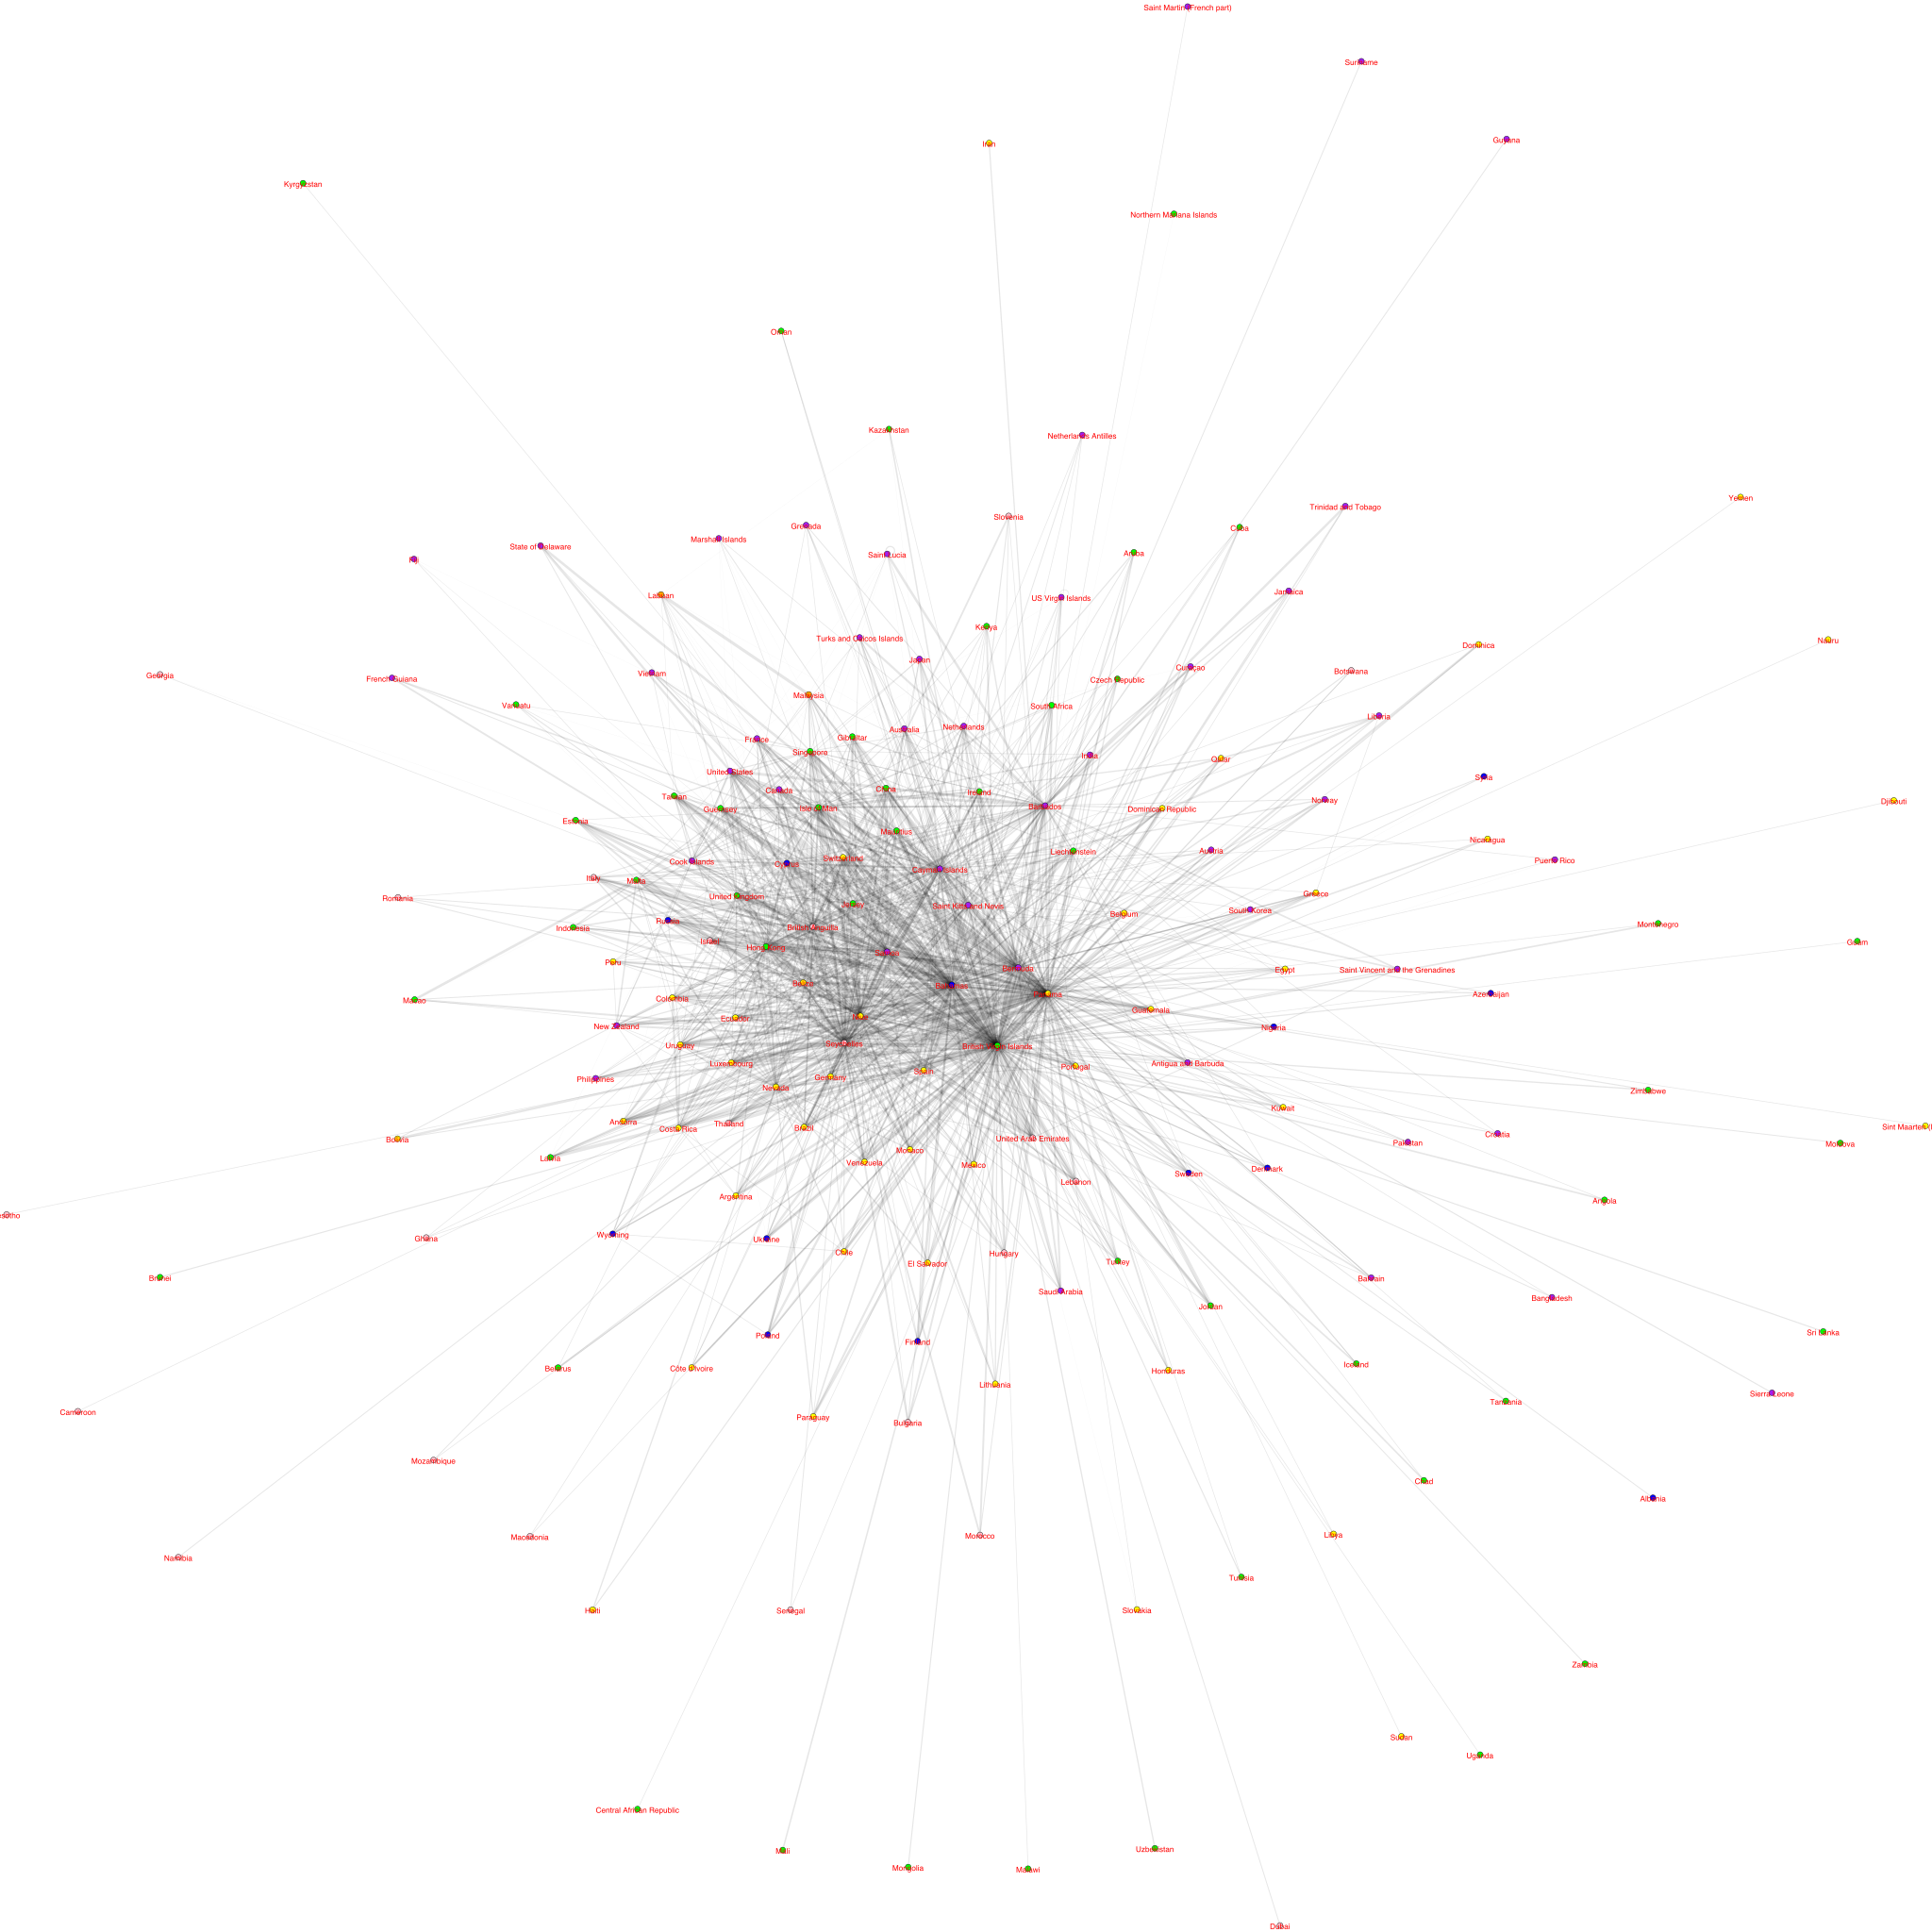

In [30]:
##plot community
visual_style = {}

vertex_colors = []

for i in range(len(comm_louvain.membership)):
    vertex_colors.append(colors[comm_louvain.membership[i]])
    
# Set bbox and margin
visual_style["bbox"] = (5000,5000)
visual_style["margin"] = 17

# Set vertex colours
visual_style["vertex_color"] = vertex_colors

# Set edge width
visual_style["edge_width"] = np.log(g.es['weight']) + 1

# Set edge color
visual_style["edge_color"] = "rgba(1,1,1,0.1)" 

# Set vertex size
visual_style["vertex_size"] = 15

# Set vertex label size
visual_style["vertex_label_size"] = 20

# Set vertex label color
visual_style["vertex_label_color"] = 'red'

# Don't curve the edges
visual_style["edge_curved"] = False

# Set the layout
my_layout = g.layout_fruchterman_reingold()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'jur_all_images/louvain_communities.png', vertex_label = g.vs['name'] , **visual_style)

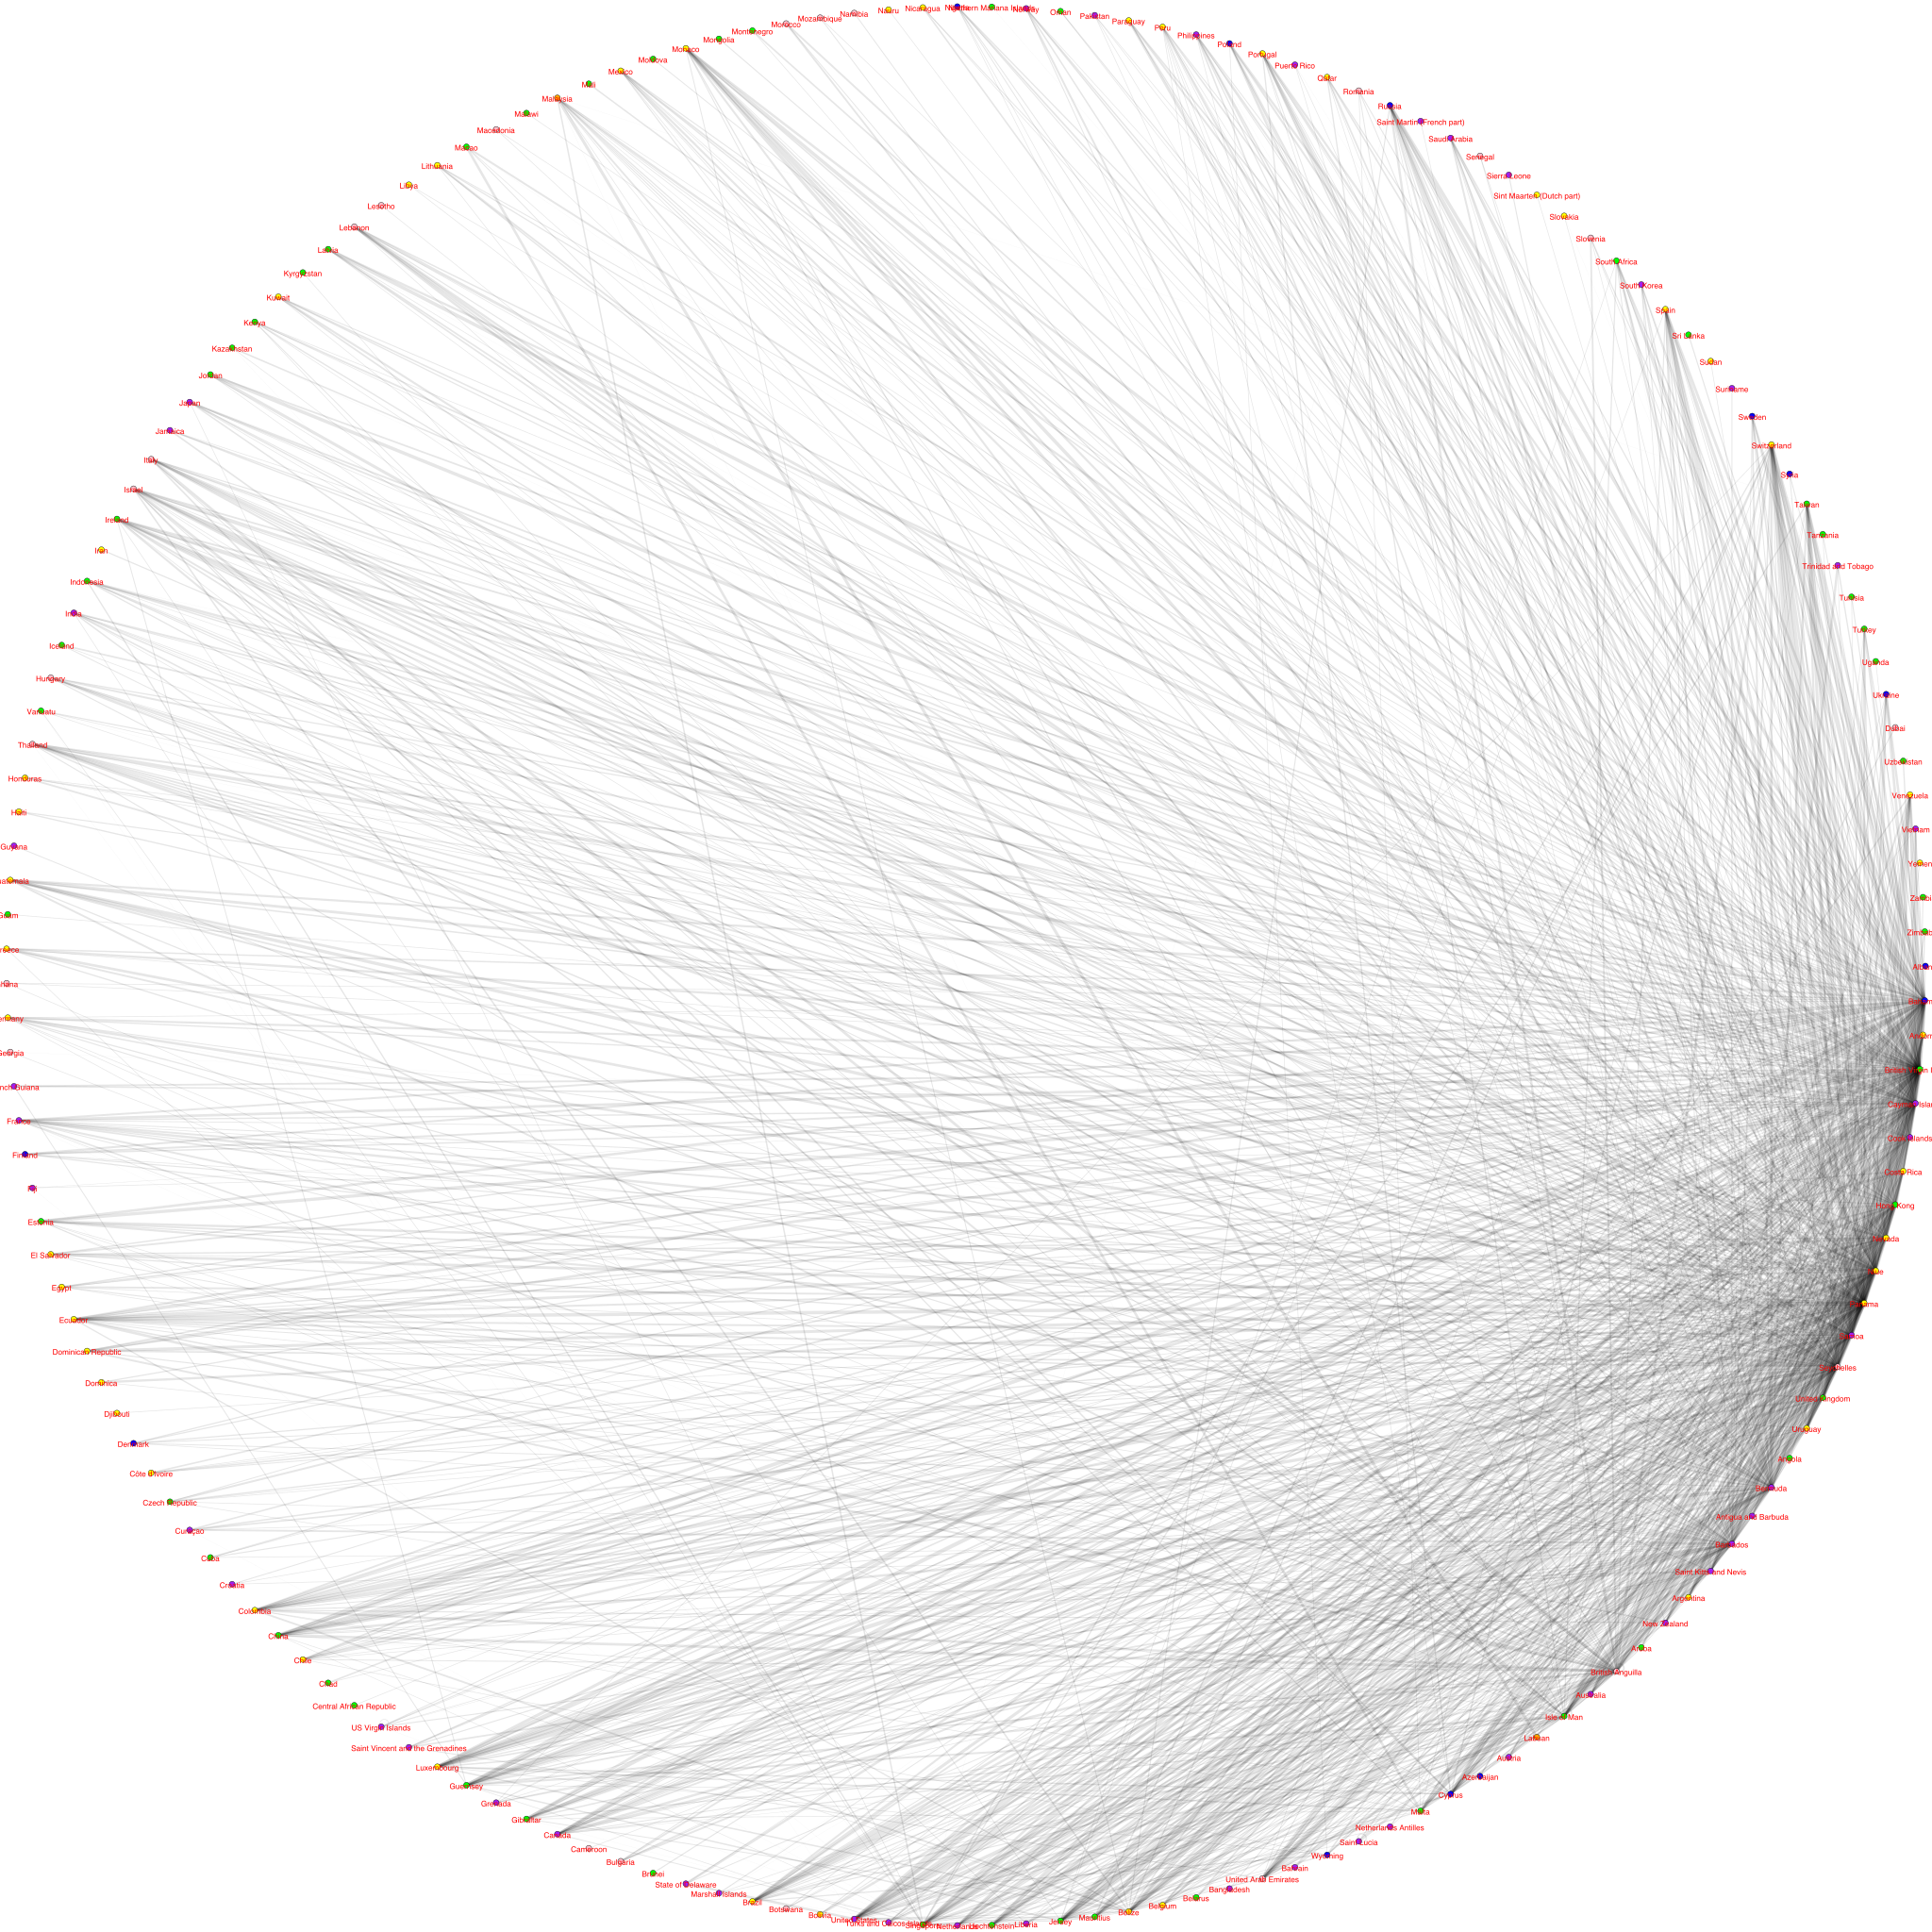

In [31]:
# Set the layout
my_layout = g.layout_circle()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'jur_all_images/louvain_circular.png', vertex_label = g.vs['name'] , **visual_style)

In [32]:
for i in range(len(comm_louvain.subgraphs())):
    
    visual_style["bbox"] = (2000,2000)
    visual_style["margin"] = 17
    
    # Set vertex colours
    visual_style["vertex_color"] = 'green'

    # Set edge width
    visual_style["edge_width"] = np.log(comm_louvain.subgraphs()[i].es['weight']) + 1
    # Set the layout
    my_layout = comm_louvain.subgraphs()[i].layout_fruchterman_reingold()
    visual_style["layout"] = my_layout

    ig.plot(comm_louvain.subgraphs()[i],'jur_all_images/louvain_subgraph' + str(i) + '.png' ,vertex_label = comm_louvain.subgraphs()[i].vs['name'],**visual_style  )
    
    
    

In [33]:
# # Set vertex colours

# visual_style["bbox"] = (300,300)
# visual_style["margin"] = 17
# visual_style["vertex_color"] = 'orange'

# # Set vertex label size
# visual_style["vertex_label_size"] = 15

# # Set the layout
# my_layout = comm_louvain.cluster_graph().layout_fruchterman_reingold()
# visual_style["layout"] = my_layout

# ig.plot(comm_louvain.cluster_graph(),'jur_all_images/test_cluster_graph.png' ,vertex_label = range(comm_louvain.cluster_graph().vcount()),**visual_style  )


### Label Propogation Community Detection

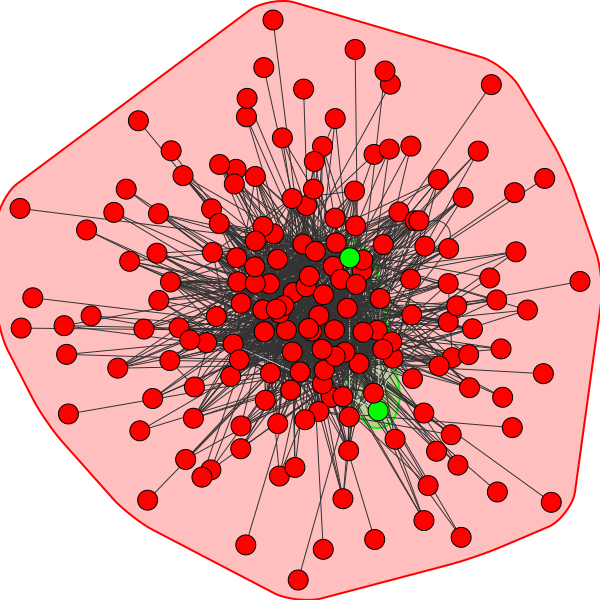

In [34]:
comm_lp= g.community_label_propagation(weights = 'weight')

ig.plot(comm_lp, mark_groups = True, layout="drl")

In [105]:
print('average weighted degree: ', get_avg_weighted_degree(comm_lp))
print('average degree: ', get_avg_degree(comm_lp))
print('transitivity: ', get_transitivity(comm_lp))
print('diameter: ', get_diameter(comm_lp))

average weighted degree:  [5008.439306358381, 845.0]
average degree:  [13.641618497109826, 1.0]
transitivity:  [0.25755787719968065, nan]
diameter:  [4, 1]


In [35]:
modularity = g.modularity(comm_lp, weights='weight')
print(modularity)

0.003881320954418831


In [96]:
print('average weighted degree: ', get_avg_weighted_degree(comm_louvain))
print('average degree: ', get_avg_degree(comm_louvain))
print('average transitivity: ', get_avg_transitivity(comm_louvain))
print('average diameter: ', get_avg_diameter(comm_louvain))

average weighted degree:  1852.823579198579
average degree:  3.238957603243317
average transitivity:  0.15047765936942256
average diameter:  2.6666666666666665


### Leading Eigenvector Community Detection

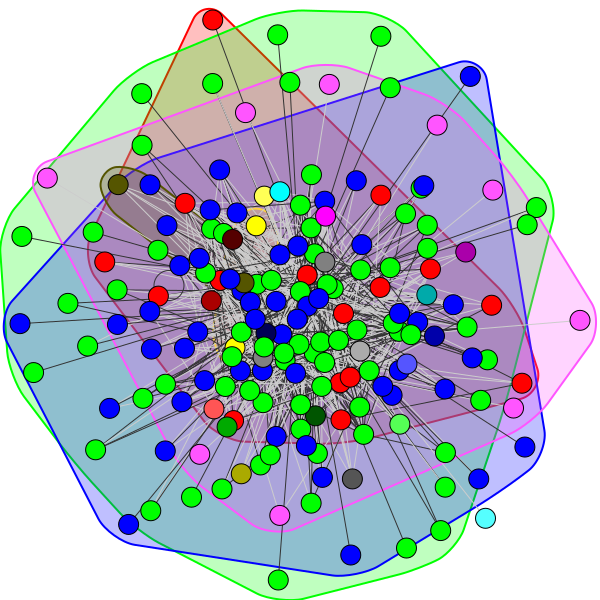

In [36]:
comm_leading_eigenvector= g.community_leading_eigenvector(weights = 'weight')

ig.plot(comm_leading_eigenvector, mark_groups = True, layout="drl")

In [37]:
modularity = g.modularity(comm_leading_eigenvector, weights='weight')
print(modularity)

0.1329364769372975


In [107]:
print('average weighted degree: ', get_avg_weighted_degree(comm_leading_eigenvector))
print('average degree: ', get_avg_degree(comm_leading_eigenvector))
print('transitivity: ', get_transitivity(comm_leading_eigenvector))
print('diameter: ', get_diameter(comm_leading_eigenvector))

average weighted degree:  [244.5, 5217.266666666666, 2703.529411764706, 8.0, 0.0, 0.0, 845.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 0.0, 0.0, 0.0, 0.0]
average degree:  [2.5, 9.013333333333334, 3.803921568627451, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0]
transitivity:  [0.14285714285714285, 0.3622222222222222, 0.131175468483816, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
diameter:  [3, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [38]:
df_leading_eigenvector = pd.DataFrame({'name': list(g.vs['name']), 'community':comm_leading_eigenvector.membership } )
df_leading_eigenvector

name  community
0                   Albania          0
1                   Bahamas          0
2                   Andorra          2
3    British Virgin Islands          1
4            Cayman Islands          1
..                      ...        ...
170               Venezuela          2
171                 Vietnam          1
172                   Yemen          2
173                  Zambia          1
174                Zimbabwe          2

[175 rows x 2 columns]

In [39]:
df_leading_eigenvector.describe()

community
count  175.000000
mean     3.720000
std      5.855187
min      0.000000
25%      1.000000
50%      1.000000
75%      2.000000
max     24.000000

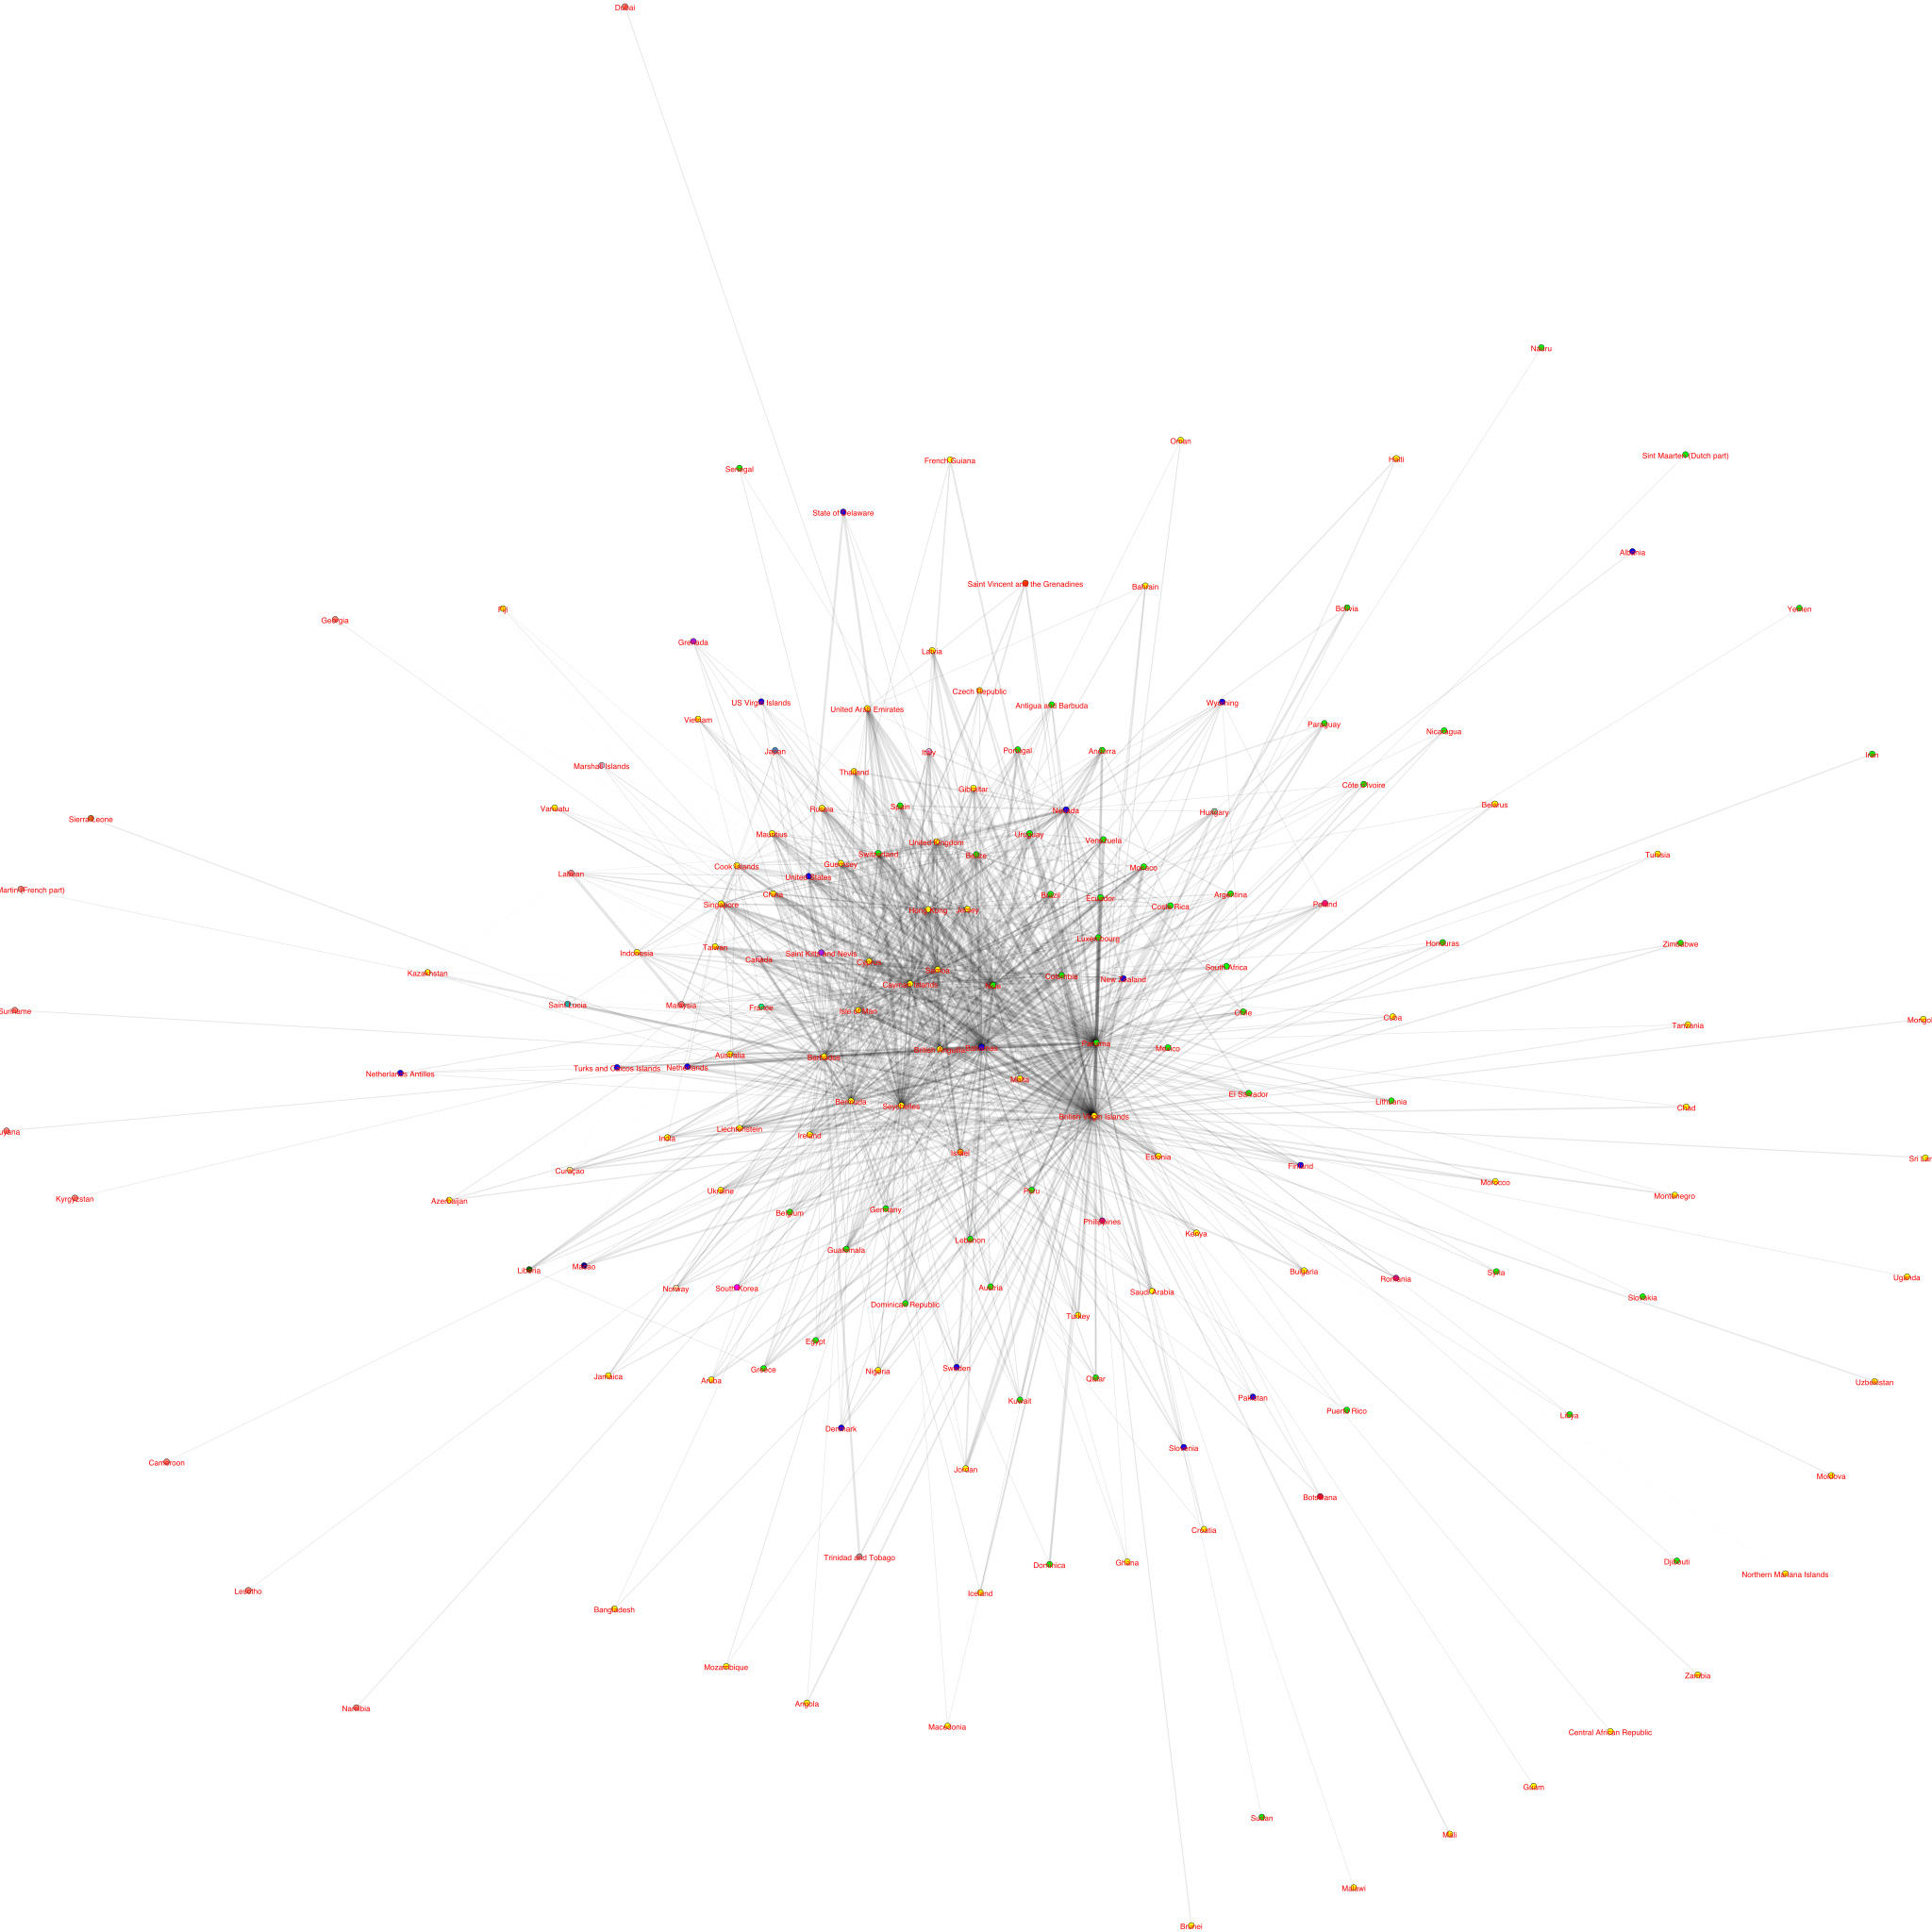

In [40]:
##plot community
visual_style = {}

vertex_colors = []

for i in range(len(comm_leading_eigenvector.membership)):
    vertex_colors.append(colors[comm_leading_eigenvector.membership[i]])
    
# Set bbox and margin
visual_style["bbox"] = (5000,5000)
visual_style["margin"] = 17

# Set vertex colours
visual_style["vertex_color"] = vertex_colors

# Set edge width
visual_style["edge_width"] = np.log(g.es['weight']) + 1

# Set edge color
visual_style["edge_color"] = "rgba(1,1,1,0.1)" 

# Set vertex size
visual_style["vertex_size"] = 15

# Set vertex label size
visual_style["vertex_label_size"] = 20

# Set vertex label color
visual_style["vertex_label_color"] = 'red'

# Don't curve the edges
visual_style["edge_curved"] = False

# Set the layout
my_layout = g.layout_fruchterman_reingold()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'jur_all_images/communities_leading_eigenvector.png', vertex_label = g.vs['name'] , **visual_style)

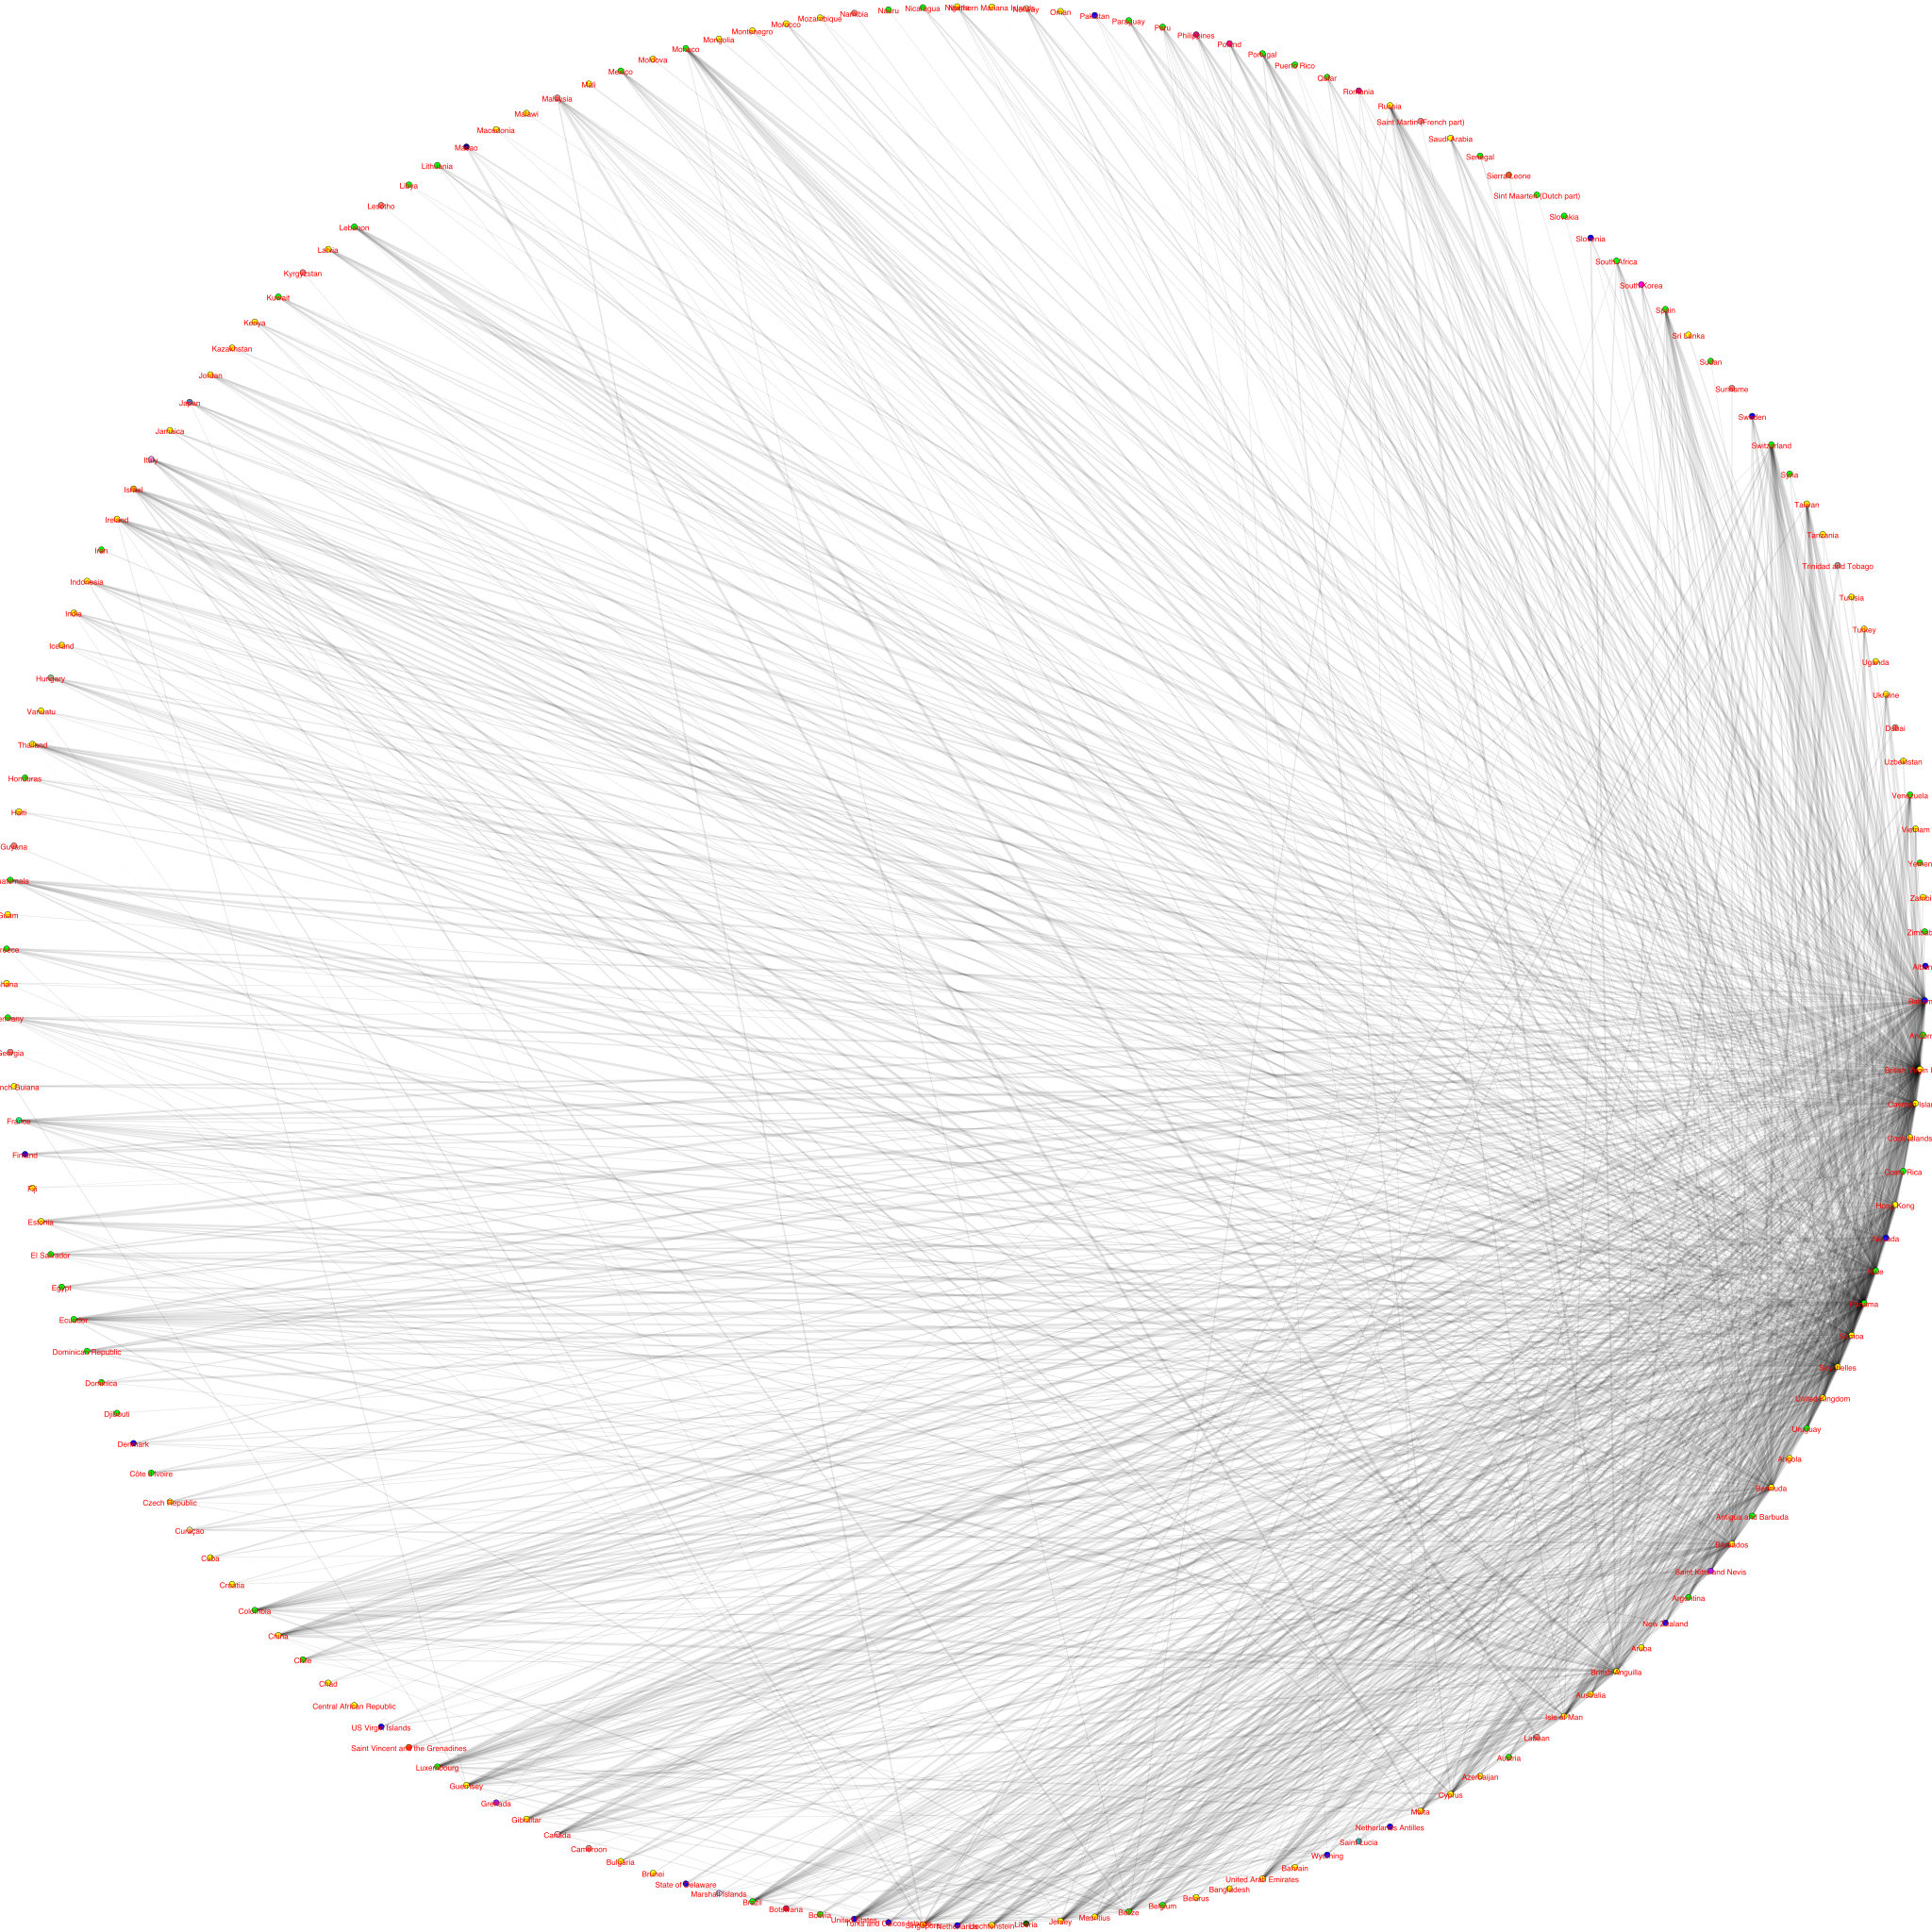

In [41]:
# Set the layout
my_layout = g.layout_circle()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'jur_all_images/leading_vector_circular.png', vertex_label = g.vs['name'] , **visual_style)

In [42]:
for i in range(len(comm_leading_eigenvector.subgraphs())):
    
    visual_style["bbox"] = (2000,2000)
    visual_style["margin"] = 17
    
    # Set vertex colours
    visual_style["vertex_color"] = 'green'

    # Set edge width
    visual_style["edge_width"] = np.log(comm_leading_eigenvector.subgraphs()[i].es['weight']) + 1
    # Set the layout
    my_layout = comm_leading_eigenvector.subgraphs()[i].layout_fruchterman_reingold()
    visual_style["layout"] = my_layout

    ig.plot(comm_leading_eigenvector.subgraphs()[i],'jur_all_images/leading_eigenvector_subgraph' + str(i) + '.png' ,vertex_label = comm_leading_eigenvector.subgraphs()[i].vs['name'],**visual_style  )
    

### Leiden Community Detection

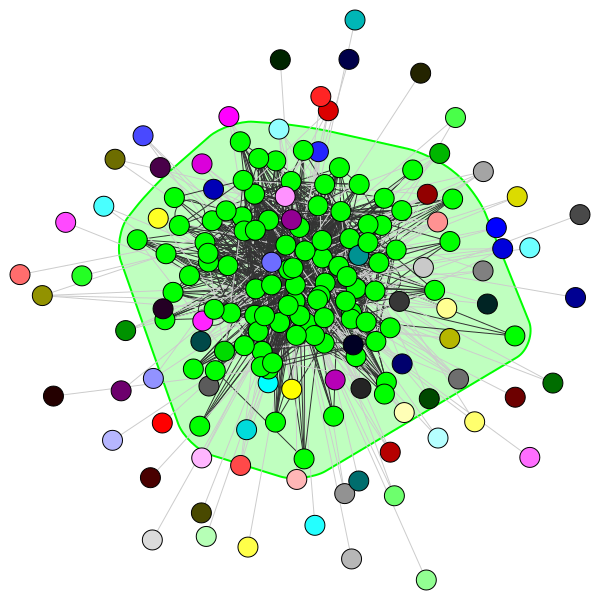

In [43]:
comm_leiden = g.community_leiden(weights = 'weight')

ig.plot(comm_leiden, mark_groups = True, layout="drl")

In [44]:
modularity = g.modularity(comm_leiden, weights='weight')
print(modularity)

5.207166225002193e-06


In [108]:
print('average weighted degree: ', get_avg_weighted_degree(comm_leiden))
print('average degree: ', get_avg_degree(comm_leiden))
print('transitivity: ', get_transitivity(comm_leiden))
print('diameter: ', get_diameter(comm_leiden))

average weighted degree:  [0.0, 9303.258064516129, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
average degree:  [0.0, 20.602150537634408, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
transitivity:  [nan, 0.3711734693877551, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

In [45]:
df_leiden = pd.DataFrame({'name': list(g.vs['name']), 'community':comm_leiden.membership } )
df_leiden

name  community
0                   Albania          0
1                   Bahamas          1
2                   Andorra          1
3    British Virgin Islands          1
4            Cayman Islands          1
..                      ...        ...
170               Venezuela          1
171                 Vietnam         79
172                   Yemen         80
173                  Zambia         81
174                Zimbabwe         82

[175 rows x 2 columns]

In [46]:
df_leiden.describe()

community
count  175.000000
mean    19.971429
std     25.981521
min      0.000000
25%      1.000000
50%      1.000000
75%     38.500000
max     82.000000

In [47]:
## no visualisation as most communities are individual?

### Optimal Modularity Community Detection

In [48]:
# #SLOW

# comm_opt_modularity = g.community_optimal_modularity(weights = 'weight')

# ig.plot(comm_opt_modularity, mark_groups = True, layout="drl")

In [49]:
# modularity = g.modularity(comm_opt_modularity, weights='weight')
# print(modularity)

In [50]:
# df_opt_modularity = pd.DataFrame({'name': list(g.vs['name']), 'community':comm_opt_modularity.membership } )
# df_opt_modularity

In [51]:
# df_opt_modularity.describe

In [52]:
# ##plot community
# visual_style = {}

# vertex_colors = []

# for i in range(len(df_opt_modularity.membership)):
#     vertex_colors.append(colors[df_opt_modularity.membership[i]])
    
# # Set bbox and margin
# visual_style["bbox"] = (5000,5000)
# visual_style["margin"] = 17

# # Set vertex colours
# visual_style["vertex_color"] = vertex_colors

# # Set edge width
# visual_style["edge_width"] = np.log(g.es['weight']) + 1

# # Set edge color
# visual_style["edge_color"] = "rgba(1,1,1,0.1)" 

# # Set vertex size
# visual_style["vertex_size"] = 15

# # Set vertex label size
# visual_style["vertex_label_size"] = 20

# # Set vertex label color
# visual_style["vertex_label_color"] = 'red'

# # Don't curve the edges
# visual_style["edge_curved"] = False

# # Set the layout
# my_layout = g.layout_fruchterman_reingold()
# visual_style["layout"] = my_layout

# # Plot the graph
# ig.plot(g,'jur_all_images/communities_optimal_modularity.png', vertex_label = g.vs['name'] , **visual_style)

In [53]:
# # Set the layout
# my_layout = g.layout_circle()
# visual_style["layout"] = my_layout

# # Plot the graph
# ig.plot(g,'jur_all_images/optimal_modularity_circular.png', vertex_label = g.vs['name'] , **visual_style)

In [54]:
# for i in range(len(optimal_modularity.subgraphs())):
    
#     visual_style["bbox"] = (2000,2000)
#     visual_style["margin"] = 17
    
#     # Set vertex colours
#     visual_style["vertex_color"] = 'green'

#     # Set edge width
#     visual_style["edge_width"] = np.log(optimal_modularity.subgraphs()[i].es['weight']) + 1
#     # Set the layout
#     my_layout = optimal_modularity_circular.subgraphs()[i].layout_fruchterman_reingold()
#     visual_style["layout"] = my_layout

#     ig.plot(optimal_modularity_circular.subgraphs()[i],'jur_all_images/optimal_modularity_subgraph' + str(i) + '.png' ,vertex_label = optimal_modularity.subgraphs()[i].vs['name'],**visual_style  )
    

### Spinglass Community Detection

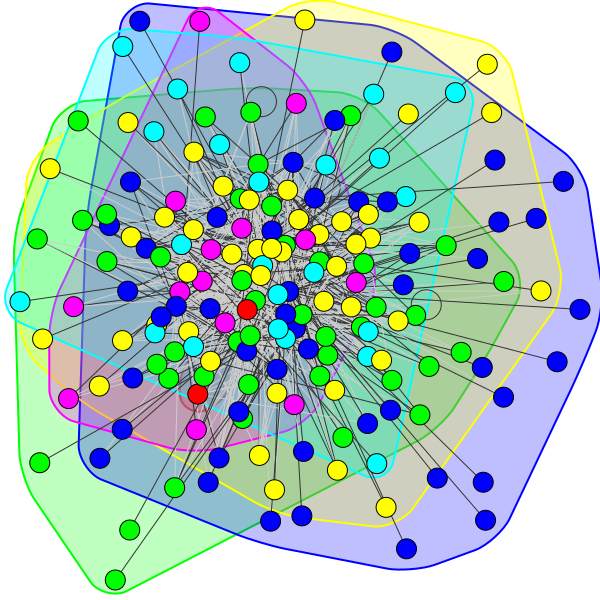

In [55]:
comm_spinglass = g.community_spinglass(weights = 'weight')

ig.plot(comm_spinglass, mark_groups = True, layout="drl")

In [56]:
modularity = g.modularity(comm_spinglass, weights='weight')
print(modularity)

0.16465889687970514


In [109]:
print('average weighted degree: ', get_avg_weighted_degree(comm_spinglass))
print('average degree: ', get_avg_degree(comm_spinglass))
print('transitivity: ', get_transitivity(comm_spinglass))
print('diameter: ', get_diameter(comm_spinglass))

average weighted degree:  [845.0, 298.6744186046512, 5479.375, 3109.3333333333335, 632.5714285714286, 886.6086956521739]
average degree:  [1.0, 4.837209302325581, 3.8333333333333335, 4.711111111111111, 2.0, 3.130434782608696]
transitivity:  [nan, 0.21428571428571427, 0.1732394366197183, 0.19753846153846155, 0.0375, 0.2125984251968504]
diameter:  [1, 4, 3, 3, 2, 3]


In [57]:
df_spinglass = pd.DataFrame({'name': list(g.vs['name']), 'community':comm_spinglass.membership } )
df_spinglass

name  community
0                   Albania          4
1                   Bahamas          4
2                   Andorra          3
3    British Virgin Islands          2
4            Cayman Islands          1
..                      ...        ...
170               Venezuela          3
171                 Vietnam          1
172                   Yemen          3
173                  Zambia          2
174                Zimbabwe          2

[175 rows x 2 columns]

In [58]:
df_spinglass.describe()

community
count  175.000000
mean     2.542857
std      1.329222
min      0.000000
25%      1.000000
50%      2.000000
75%      3.000000
max      5.000000

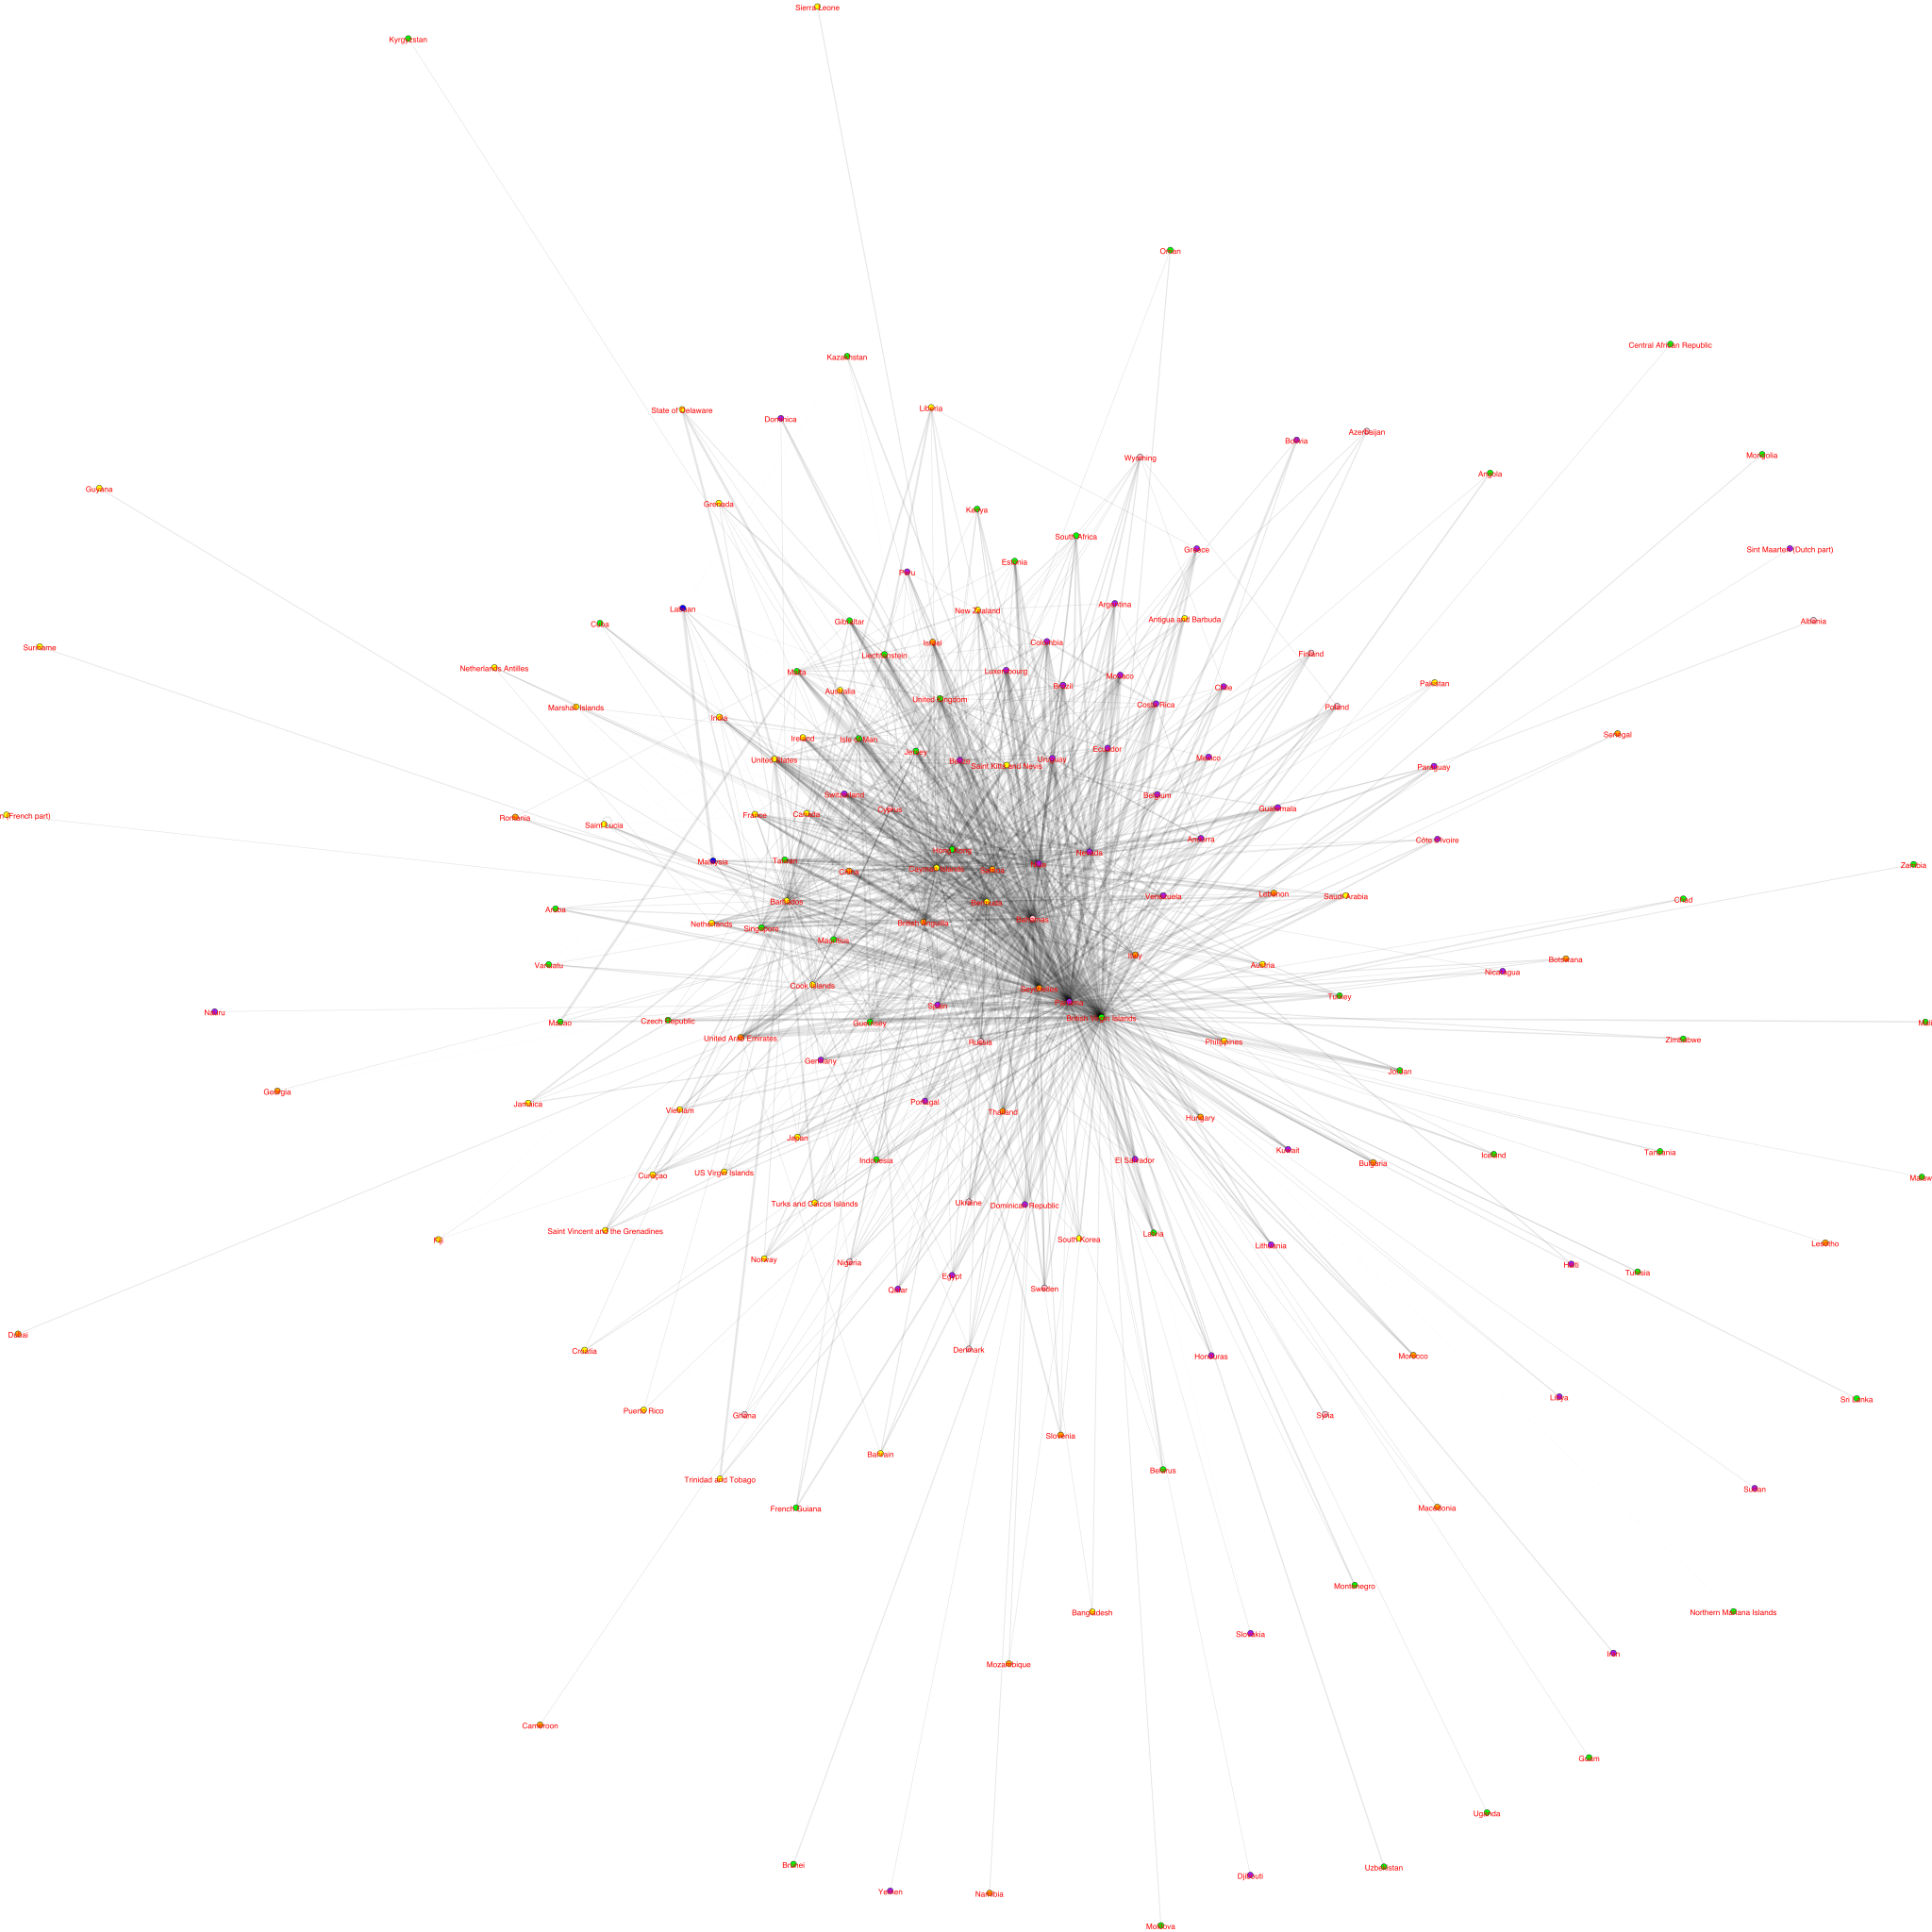

In [59]:
##plot community
visual_style = {}

vertex_colors = []

for i in range(len(comm_spinglass.membership)):
    vertex_colors.append(colors[comm_spinglass.membership[i]])
    
# Set bbox and margin
visual_style["bbox"] = (5000,5000)
visual_style["margin"] = 17

# Set vertex colours
visual_style["vertex_color"] = vertex_colors

# Set edge width
visual_style["edge_width"] = np.log(g.es['weight']) + 1

# Set edge color
visual_style["edge_color"] = "rgba(1,1,1,0.1)" 

# Set vertex size
visual_style["vertex_size"] = 15

# Set vertex label size
visual_style["vertex_label_size"] = 20

# Set vertex label color
visual_style["vertex_label_color"] = 'red'

# Don't curve the edges
visual_style["edge_curved"] = False

# Set the layout
my_layout = g.layout_fruchterman_reingold()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'jur_all_images/communities_spinglass.png', vertex_label = g.vs['name'] , **visual_style)

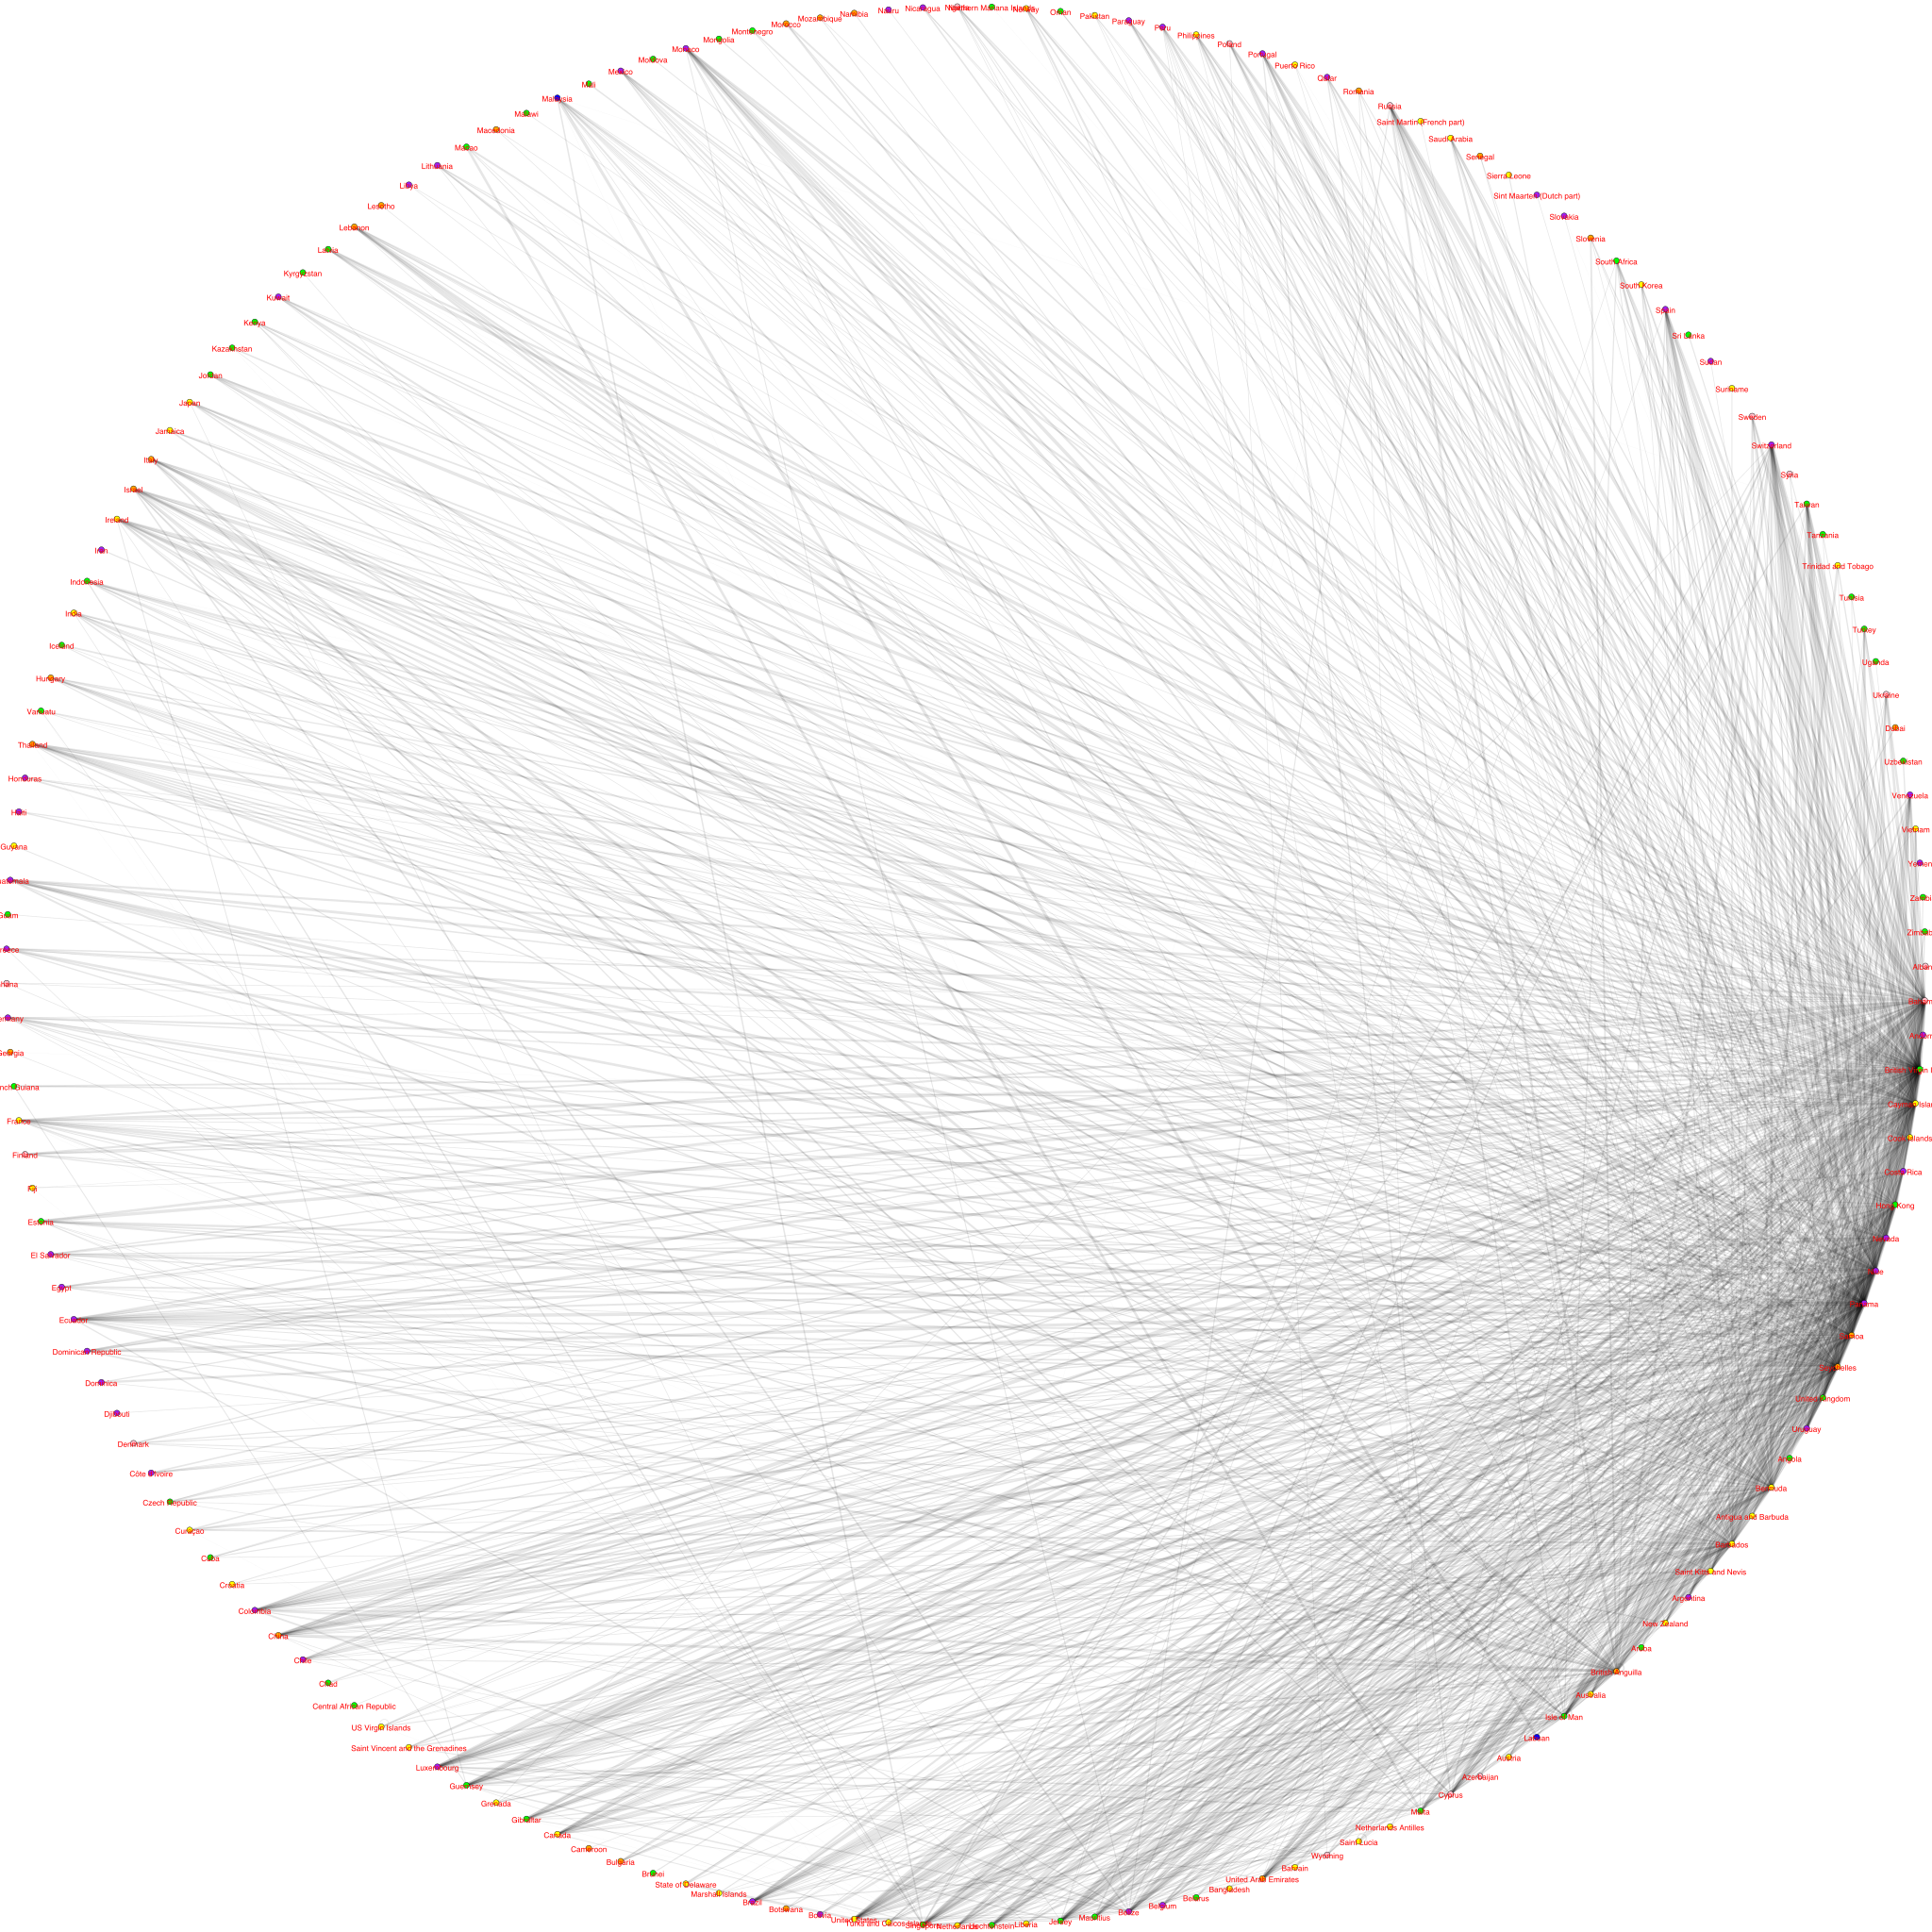

In [60]:
# Set the layout
my_layout = g.layout_circle()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'jur_all_images/spinglass_circular.png', vertex_label = g.vs['name'] , **visual_style)

In [61]:
for i in range(len(comm_spinglass.subgraphs())):
    
    visual_style["bbox"] = (2000,2000)
    visual_style["margin"] = 17
    
    # Set vertex colours
    visual_style["vertex_color"] = 'green'

    # Set edge width
    visual_style["edge_width"] = np.log(comm_spinglass.subgraphs()[i].es['weight']) + 1
    # Set the layout
    my_layout = comm_spinglass.subgraphs()[i].layout_fruchterman_reingold()
    visual_style["layout"] = my_layout

    ig.plot(comm_spinglass.subgraphs()[i],'jur_all_images/spinglass_subgraph' + str(i) + '.png' ,vertex_label = comm_spinglass.subgraphs()[i].vs['name'],**visual_style  )
    

### Walktrap Community Detection

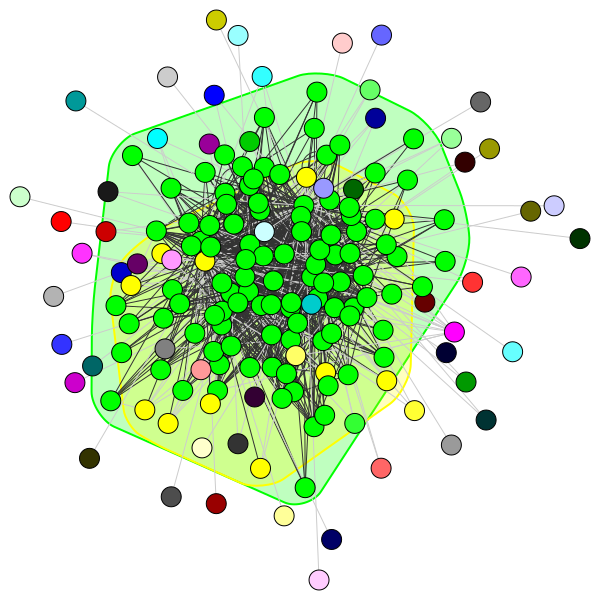

In [62]:
walktrap = g.community_walktrap(weights = 'weight', steps = 2)

comm_walktrap = walktrap.as_clustering()

ig.plot(comm_walktrap, mark_groups = True, layout="drl")

In [63]:
modularity = g.modularity(comm_walktrap, weights='weight')
print(modularity)

0.004762528335317103


In [110]:
print('average weighted degree: ', get_avg_weighted_degree(comm_walktrap))
print('average degree: ', get_avg_degree(comm_walktrap))
print('transitivity: ', get_transitivity(comm_walktrap))
print('diameter: ', get_diameter(comm_walktrap))

average weighted degree:  [0.0, 8222.567307692309, 0.0, 114.18181818181819, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
average degree:  [0.0, 18.28846153846154, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
transitivity:  [nan, 0.3268184256917299, nan, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

In [64]:
df_walktrap = pd.DataFrame({'name': list(g.vs['name']), 'community':comm_walktrap.membership } )
df_walktrap

name  community
0                   Albania          0
1                   Bahamas          1
2                   Andorra          1
3    British Virgin Islands          1
4            Cayman Islands          1
..                      ...        ...
170               Venezuela          1
171                 Vietnam          1
172                   Yemen         59
173                  Zambia         60
174                Zimbabwe         61

[175 rows x 2 columns]

In [65]:
df_walktrap.describe()

community
count  175.000000
mean    11.565714
std     17.667913
min      0.000000
25%      1.000000
50%      1.000000
75%     17.500000
max     61.000000

In [66]:
## no visualisation since too many communities, mostly individual

### Infomap Community Detection

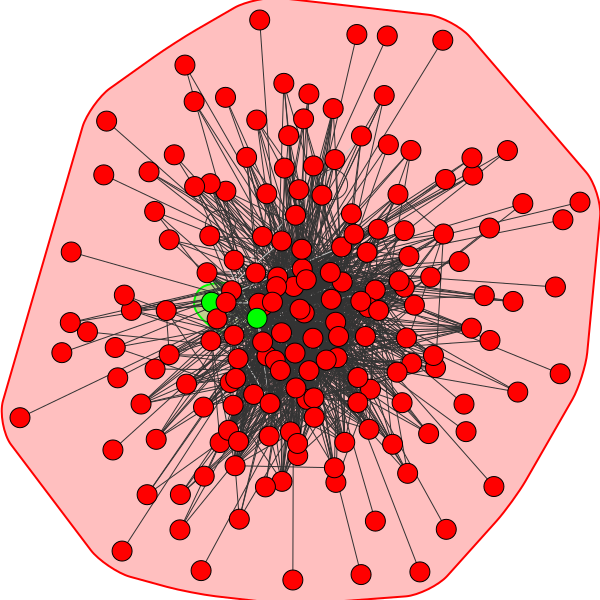

In [67]:
comm_infomap = g.community_infomap(edge_weights = 'weight')

ig.plot(comm_infomap, mark_groups = True, layout="drl")

In [68]:
modularity = g.modularity(comm_infomap, weights='weight')
print(modularity)

0.003881320954418831


In [112]:
print('average weighted degree: ', get_avg_weighted_degree(comm_infomap))
print('average degree: ', get_avg_degree(comm_infomap))
print('transitivity: ', get_transitivity(comm_infomap))
print('diameter: ', get_diameter(comm_infomap))

average weighted degree:  [5008.439306358381, 845.0]
average degree:  [13.641618497109826, 1.0]
transitivity:  [0.25755787719968065, nan]
diameter:  [4, 1]


In [69]:
df_infomap = pd.DataFrame({'name': list(g.vs['name']), 'community':comm_infomap.membership } )
df_infomap

name  community
0                   Albania          0
1                   Bahamas          0
2                   Andorra          0
3    British Virgin Islands          0
4            Cayman Islands          0
..                      ...        ...
170               Venezuela          0
171                 Vietnam          0
172                   Yemen          0
173                  Zambia          0
174                Zimbabwe          0

[175 rows x 2 columns]

In [70]:
## no visualisation since no community is detected

### Fast Greedy Community Detection

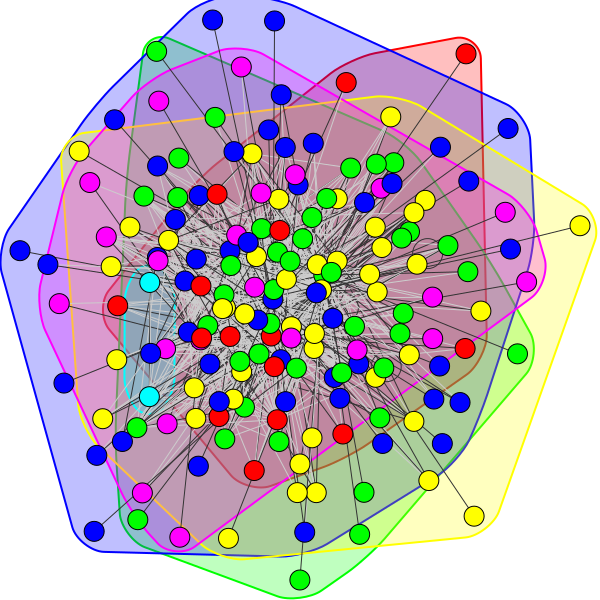

In [71]:
fg = g.community_fastgreedy(weights = 'weight')

comm_fastgreedy = fg.as_clustering()

ig.plot(comm_fastgreedy, mark_groups = True, layout="drl")

In [72]:
modularity = g.modularity(comm_fastgreedy, weights='weight')
print(modularity)

0.16289420101025118


print('average weighted degree: ', get_avg_weighted_degree(comm_fastgreedy))
print('average degree: ', get_avg_degree(comm_fastgreedy))
print('transitivity: ', get_transitivity(comm_fastgreedy))
print('diameter: ', get_diameter(comm_fastgreedy))

In [73]:
df_fastgreedy = pd.DataFrame({'name': list(g.vs['name']), 'community':comm_fastgreedy.membership } )
df_fastgreedy

name  community
0                   Albania          0
1                   Bahamas          0
2                   Andorra          1
3    British Virgin Islands          2
4            Cayman Islands          3
..                      ...        ...
170               Venezuela          1
171                 Vietnam          3
172                   Yemen          1
173                  Zambia          2
174                Zimbabwe          2

[175 rows x 2 columns]

In [74]:
df_fastgreedy.describe()

community
count  175.000000
mean     2.120000
std      1.199808
min      0.000000
25%      1.000000
50%      2.000000
75%      3.000000
max      5.000000

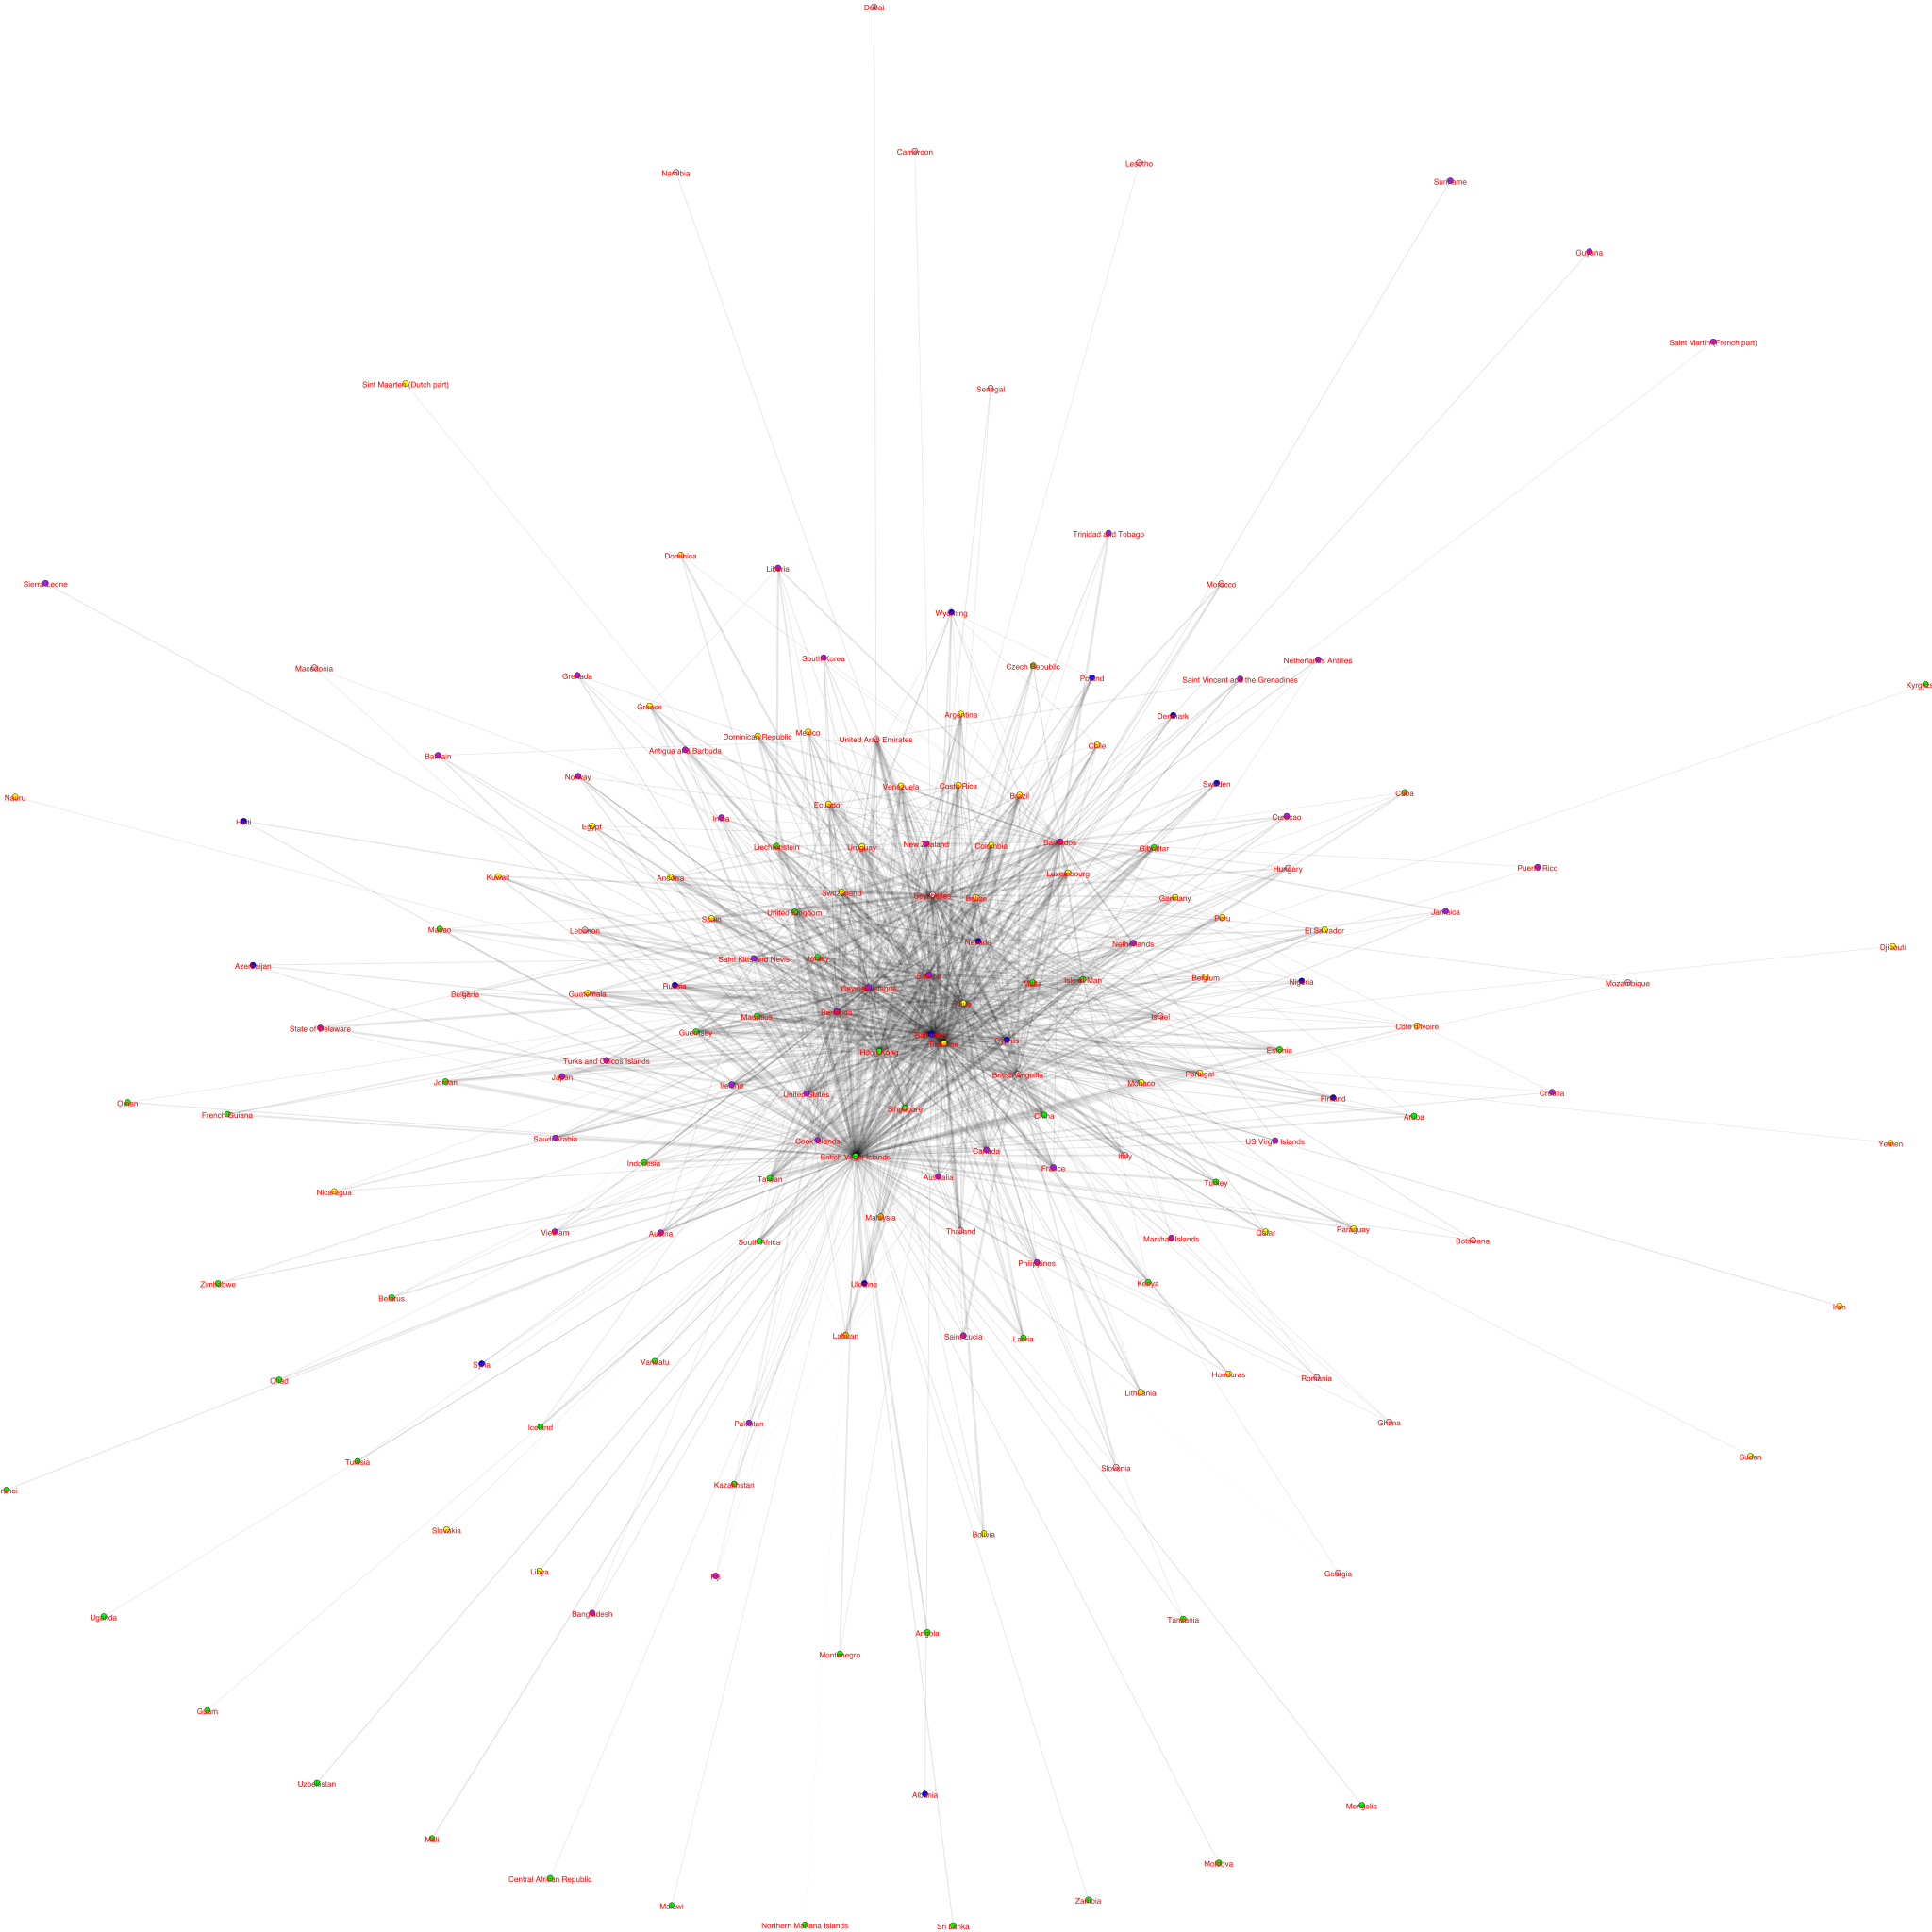

In [75]:
##plot community
visual_style = {}

vertex_colors = []

for i in range(len(comm_fastgreedy.membership)):
    vertex_colors.append(colors[comm_fastgreedy.membership[i]])
    
# Set bbox and margin
visual_style["bbox"] = (5000,5000)
visual_style["margin"] = 17

# Set vertex colours
visual_style["vertex_color"] = vertex_colors

# Set edge width
visual_style["edge_width"] = np.log(g.es['weight']) + 1

# Set edge color
visual_style["edge_color"] = "rgba(1,1,1,0.1)" 

# Set vertex size
visual_style["vertex_size"] = 15

# Set vertex label size
visual_style["vertex_label_size"] = 20

# Set vertex label color
visual_style["vertex_label_color"] = 'red'

# Don't curve the edges
visual_style["edge_curved"] = False

# Set the layout
my_layout = g.layout_fruchterman_reingold()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'jur_all_images/communities_fastgreedy.png', vertex_label = g.vs['name'] , **visual_style)

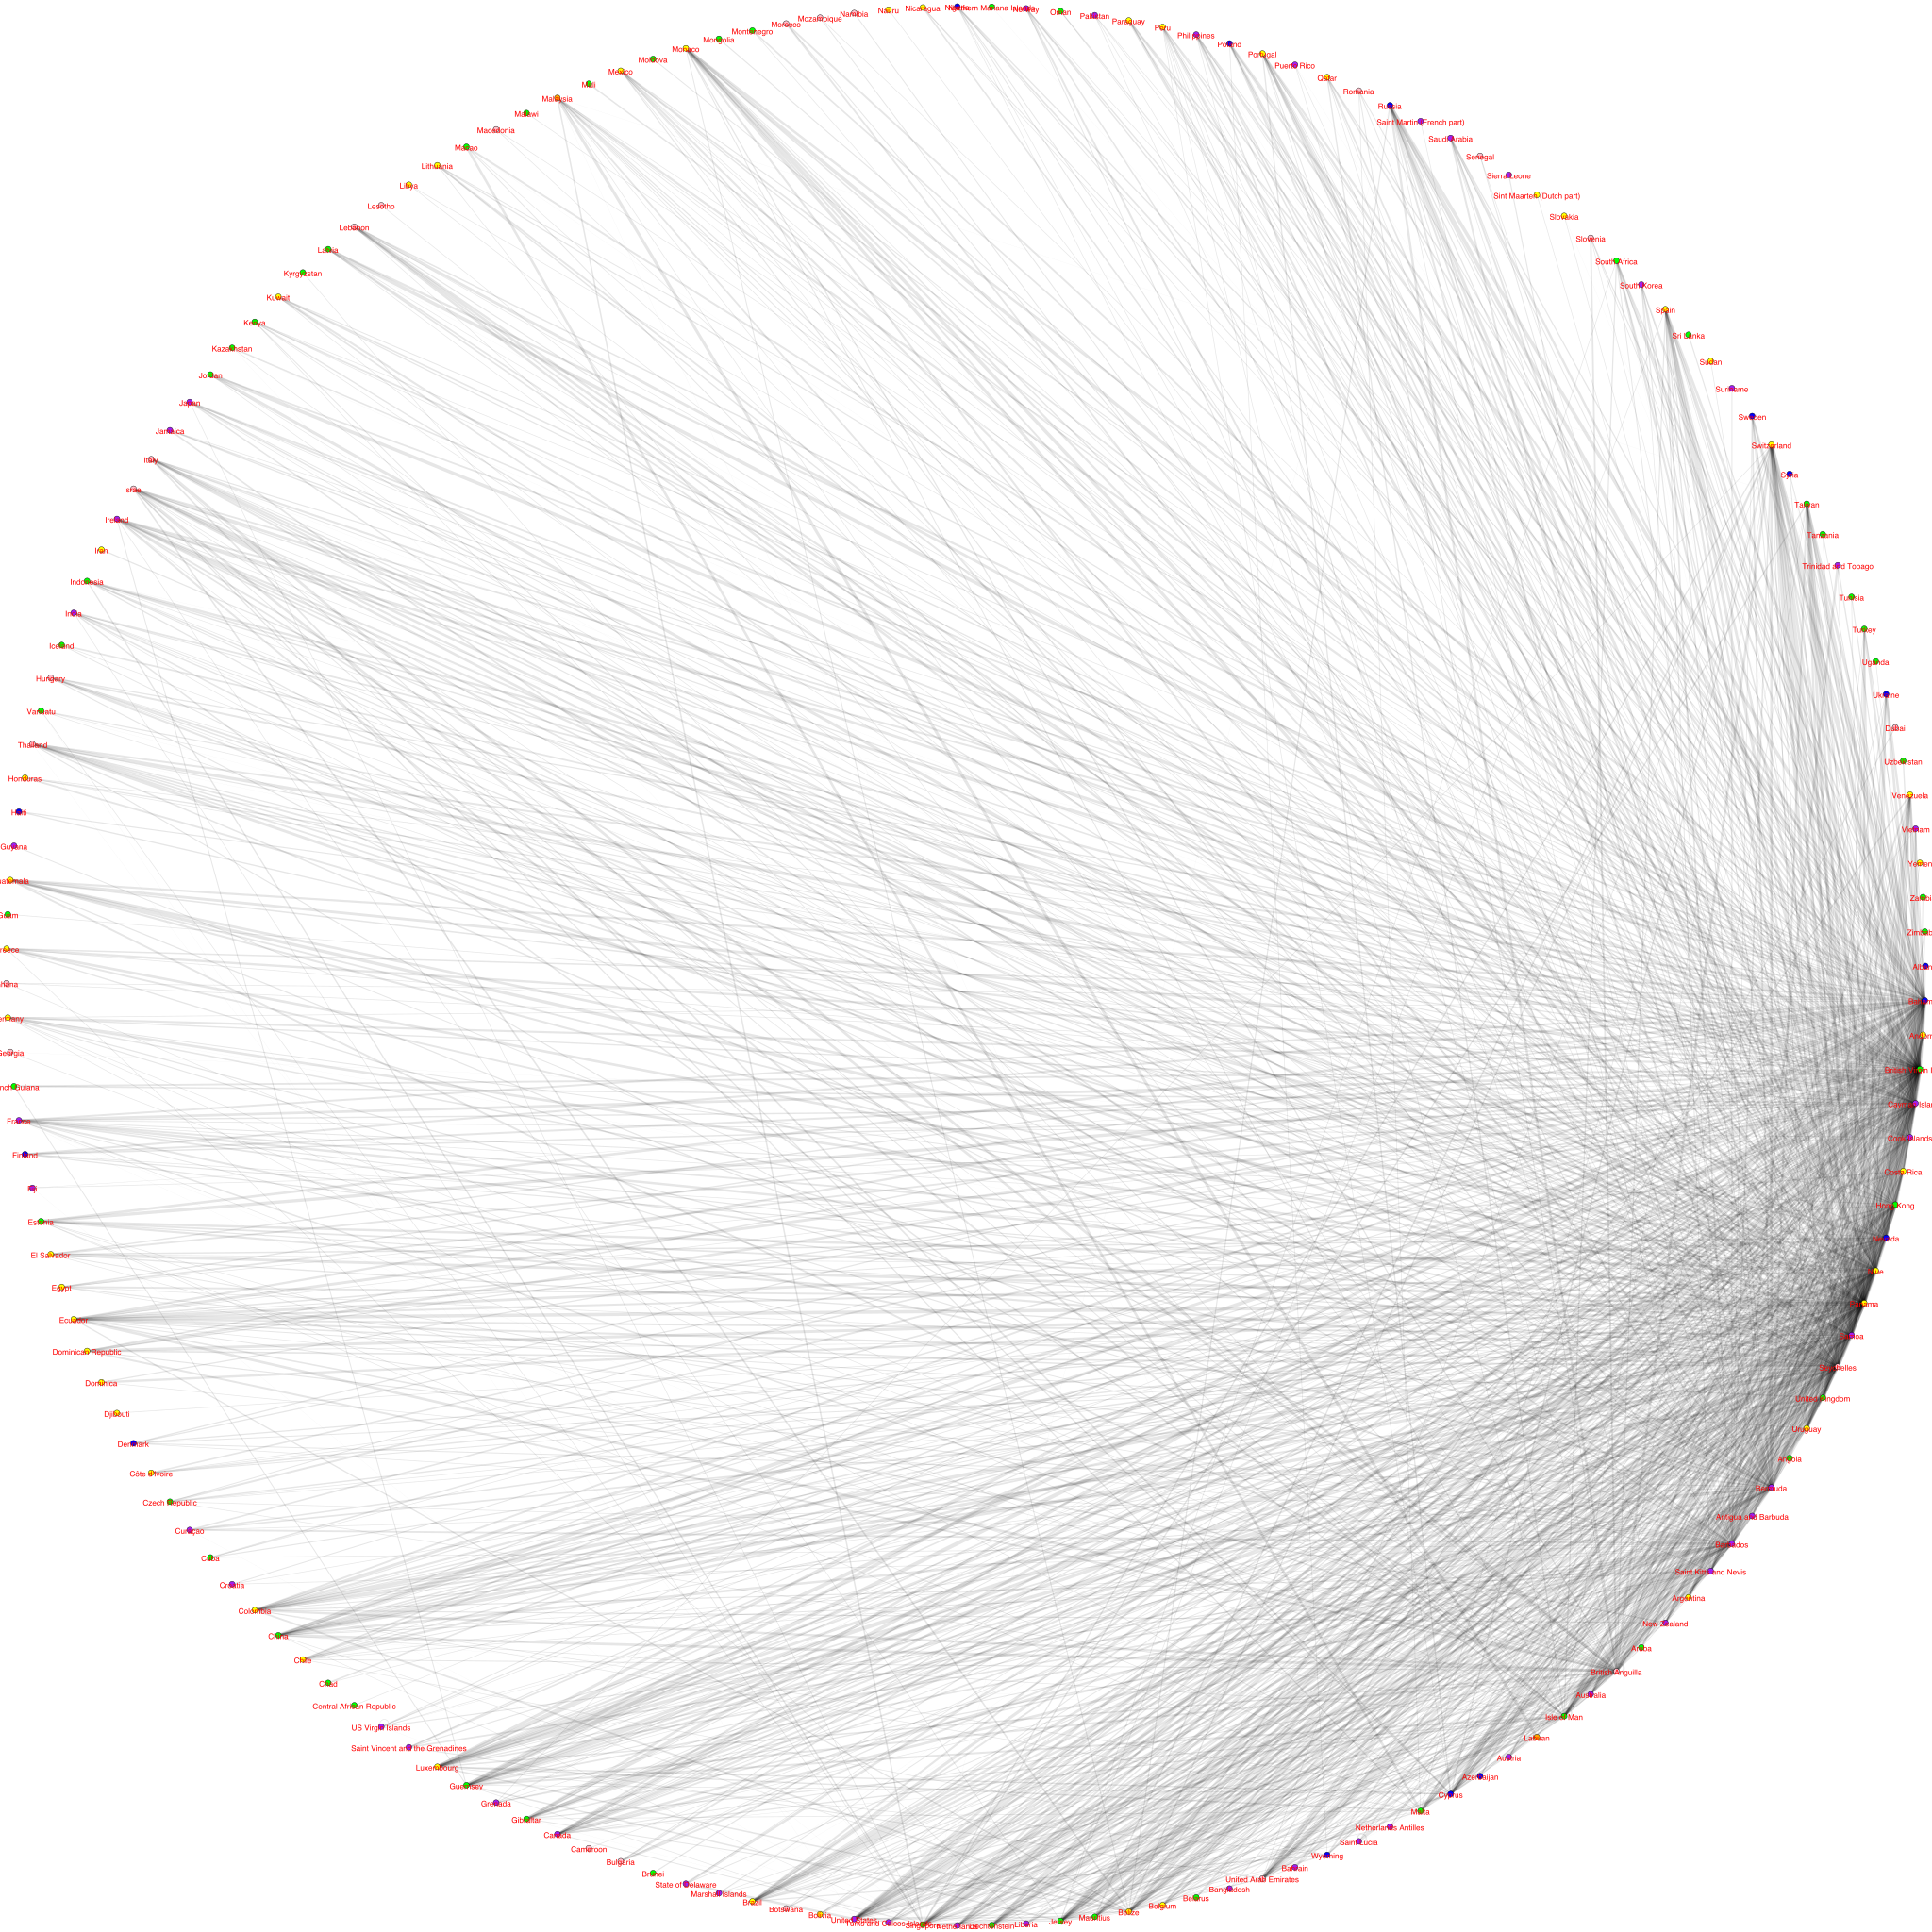

In [76]:
# Set the layout
my_layout = g.layout_circle()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'jur_all_images/fastgreedy_circular.png', vertex_label = g.vs['name'] , **visual_style)

In [77]:
for i in range(len(comm_fastgreedy.subgraphs())):
    
    visual_style["bbox"] = (2000,2000)
    visual_style["margin"] = 17
    
    # Set vertex colours
    visual_style["vertex_color"] = 'green'

    # Set edge width
    visual_style["edge_width"] = np.log(comm_fastgreedy.subgraphs()[i].es['weight']) + 1
    # Set the layout
    my_layout = comm_fastgreedy.subgraphs()[i].layout_fruchterman_reingold()
    visual_style["layout"] = my_layout

    ig.plot(comm_fastgreedy.subgraphs()[i],'jur_all_images/fastgreedy_subgraph' + str(i) + '.png' ,vertex_label = comm_fastgreedy.subgraphs()[i].vs['name'],**visual_style  )
    

In [80]:
get_avg_diameter(comm_fastgreedy)

2.6666666666666665

In [81]:
get_avg_transitivity(comm_fastgreedy)

0.14719170395542702